## **Откроем файл и изучим общую информацию** 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats as st
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [63]:
# df = pd.read_csv('/datasets/games.csv')
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [65]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


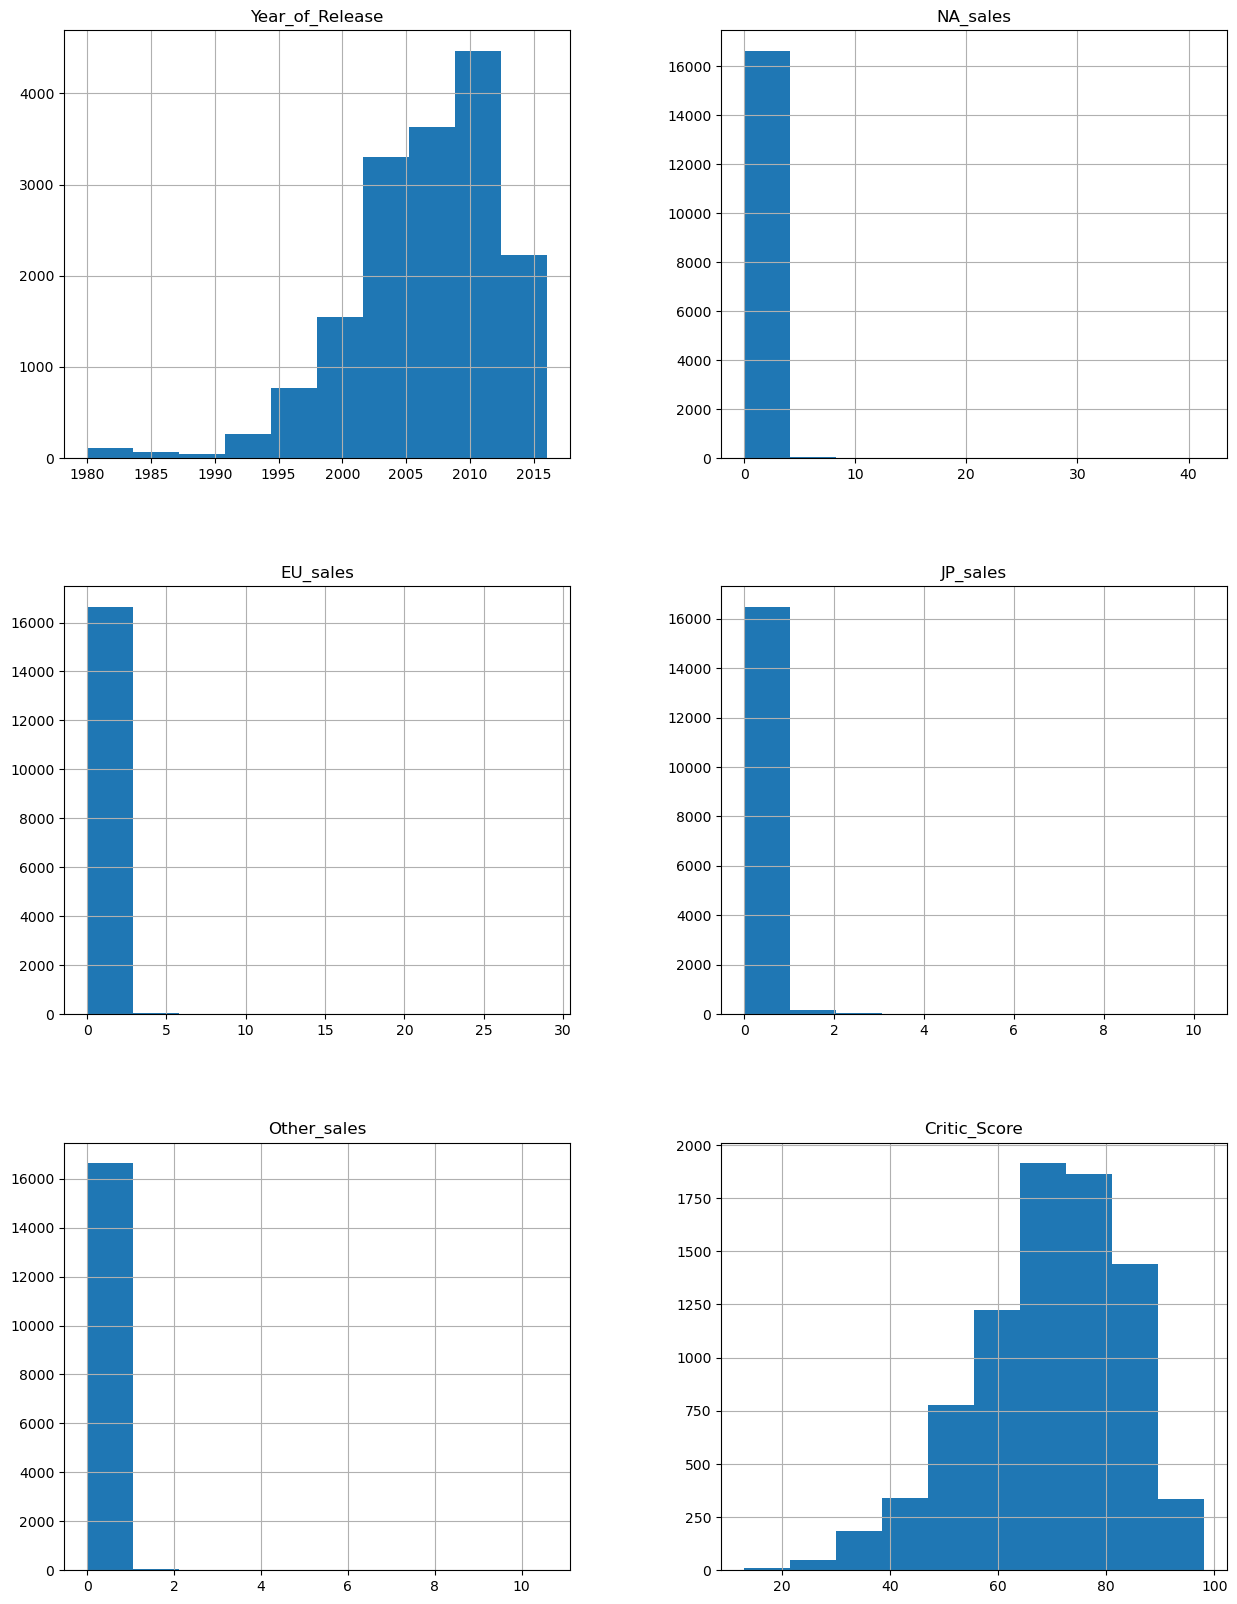

In [66]:
df.hist(figsize = (15,20))
plt.show()

In [67]:
df.duplicated().sum()

0

**Вывод**

Предстоит обработать и проанализировать датафрейм(df), состоящий из 10 стобцов и 16715 строк.\
Сразу мы можем обратить внимания на пропуски в следующих столбцах:\
название\
год релиза\
жанр\
оценка критиков\
оценка пользователей\
рейтинг ESRB\
И обратить внимание, что в следующих столбцах неверные типы данных:
оценка пользователей\
Необходимо обработать данные и рассмотреть каждый столбец в отдельности

## **Предобработка данных**

*Приведем название столбцов к нижнем регистру*

In [68]:
# df = df.rename(
#     columns = {
#         'Name' : 'name',
#         'Platform' : 'platform',
#         'Year_of_Release' : 'year_of_release',
#         'Genre' : 'genre',
#         'NA_sales' : 'na_sales',
#         'EU_sales' : 'eu_sales',
#         'JP_sales' : 'jp_sales',
#         'Other_sales' : 'other_sales',
#         'Critic_Score' : 'critic_store',
#         'User_Score' : 'user_score',
#         'Rating' : 'rating',
#     }
# )

df.columns = df.columns.str.lower()
# df.columns

In [69]:
old_shape = df.shape
#old_shape

*Для дальнейшего сравнения какую долю информации мы сократили*

*Обработаем пропуски в столбцах*

In [70]:
df[df['name'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [71]:
df = df.dropna(subset = ['name'])

*Всего два пропуска, мы можем их удалить без каких-либо потерь для дальнейшего анализа*

In [72]:
df['name'].isna().sum()

0

In [73]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [74]:
df = df.dropna(subset = ['year_of_release'])

In [75]:
df['year_of_release'].isna().sum()

0

In [76]:
df = df.dropna(subset = ['genre'])
df['genre'].isna().sum()


0

*Проверим сколько данных мы потеряли*

In [77]:
new_shape = df.shape[0] / old_shape[0]
new_shape

0.9837870176488184

*Проверим возможность провести агрегацию в столбце рейтинг ESRB*

In [78]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [79]:
df[df['genre'] == 'Racing']['rating'].value_counts()

E       576
T       167
E10+     95
M        18
Name: rating, dtype: int64

In [80]:
df['rating'] = df['rating'].fillna('Unknown')
# df[df['rating'] == 'Unknown']

*Даже такой 'нежестокий' жанр, как гонки может иметь совсем разный рейтинг, агрегация по жанрам невозможна, по платформам тем более*

In [81]:
# df['user_score'] = df['user_score'].replace('tbd', np.nan, inplace=True)
df.loc[df['user_score']  == 'tbd', 'user_score'] = np.nan

*TBD -  Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации*

In [82]:
display(df[df['user_score'] == 'tbd']['user_score'].count())

0

*Пропуски в столбцах оценка критиков и оценка пользователец - может быть связана как с тем,что игра слишком старая или игра новинка\
Так же игра может быть малопопулярна\
Пропуски не трогаем, это повлияет на дальнейший анализ*

*Создадим столбец world sales*

In [83]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# df['world_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [84]:
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


*Изменим тип данных*

In [85]:
# df['year_of_release'] = df['year_of_release'].astype('int')
# df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')

## **Анализ Данных**

### **Посмотрим выпуск игр по годам**

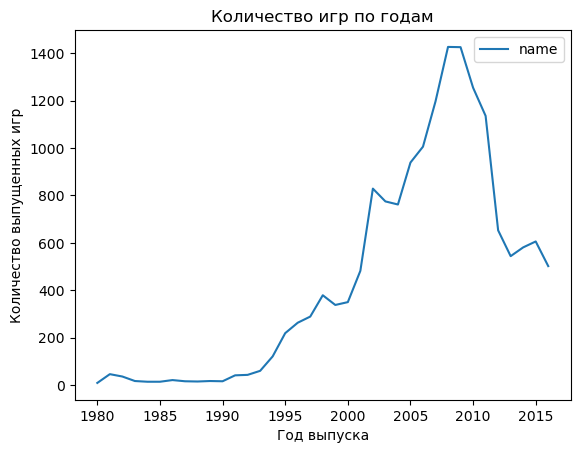

In [86]:
game_release_per_year = df.pivot_table(index = 'year_of_release', values = 'name' , aggfunc = 'count')
# game_release_per_year
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.figsize = (20,12)
plt.legend('')
sns.lineplot(data=game_release_per_year)
plt.show()


In [87]:
number_of_sales = df.groupby('year_of_release')[['world_sales']].sum()
number_of_release = df.groupby('year_of_release')[['name']].count()
df1 = number_of_sales.join(number_of_release)
df1.columns = ['world_sales', 'number_of_games']
trace0 = go.Scatter(
    x=df1.index,
    y=df1.world_sales,
    name='Количество проданных игр, млн'
)

trace1 = go.Scatter(
    x=df1.index,
    y=df1.number_of_games,
    name='Количество выпущенных игр'
)

data = [trace0, trace1]
layout = {'title': 'Производство и продажа игр по годам'}

fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link=False)

*Из графика видно, что с 1995 количество игр начинает ежегодно расти скачкообразно.\
Начало развития мира компьютерных игр, игр на приставки - появление CD- носителей, появление новых операционок, появление и немалая популярность приставок : SEGA, PS, XBOX, PSP ( в дальнейшем)\
Развитие интернета - реклама, платформы для продажи игр\
Спад после 2008-2009 года - развитие мобильных игр, развитие мобильных операционок, спад интереса в приставках - уклон в мобильные и компьютерные игры в своей массе*

### **Рассмотрим продажи по платформам**

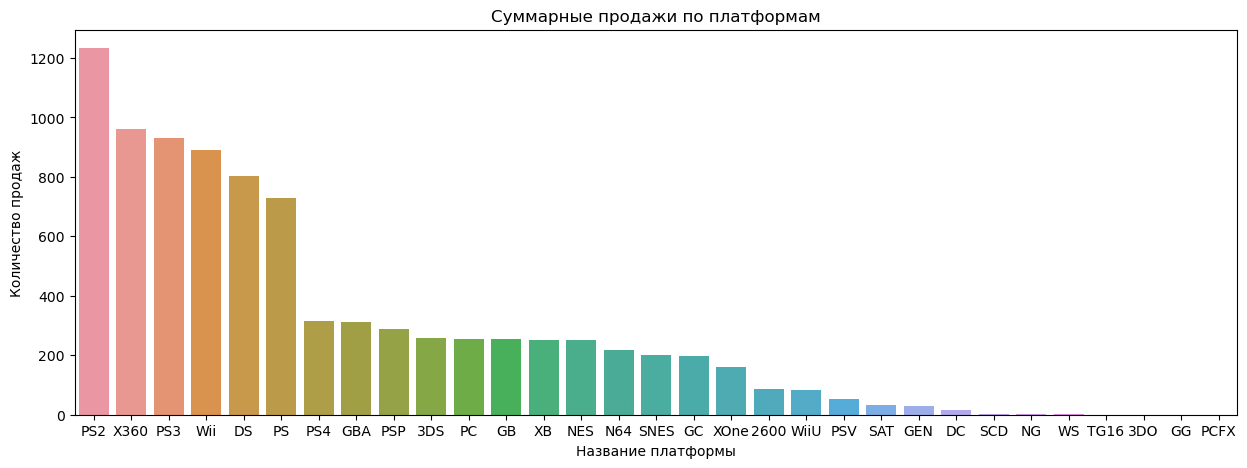

In [88]:
sales_by_platform = df.pivot_table(index = 'platform', values = ['world_sales', 'year_of_release'], aggfunc = 'sum').sort_values(by = 'world_sales', ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = sales_by_platform.index, y = sales_by_platform['world_sales'])
plt.title('Суммарные продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()

*Явная пятерка лидеров: PS2, X360, PS3, Wii, DS, PS - основоположники и 'легенды" приставок*

### **Посмотрим временной период 'жизни' платформ**

In [89]:
platform_data = df['platform'].unique()
platform_data

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

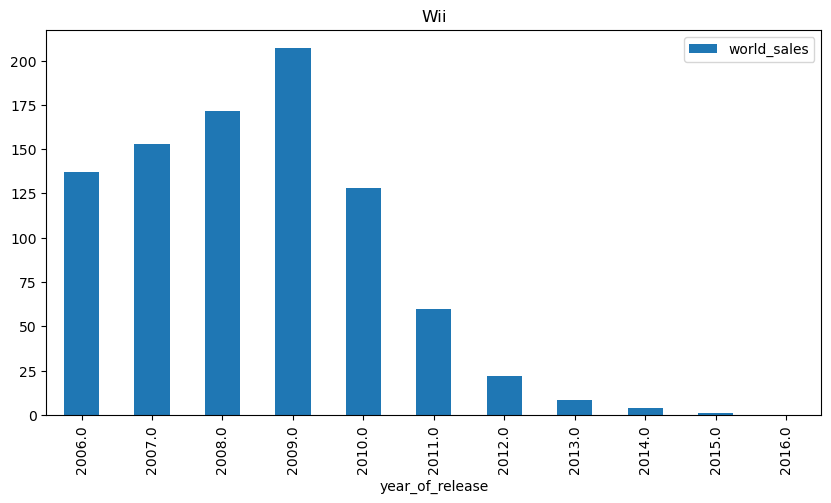

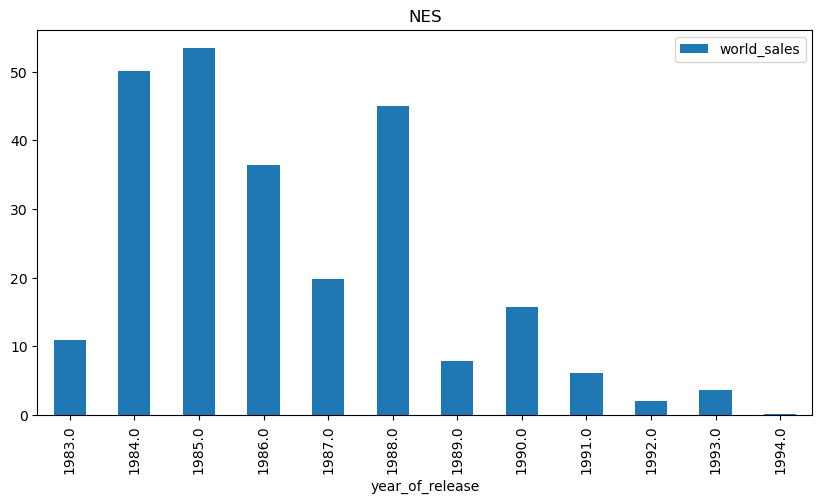

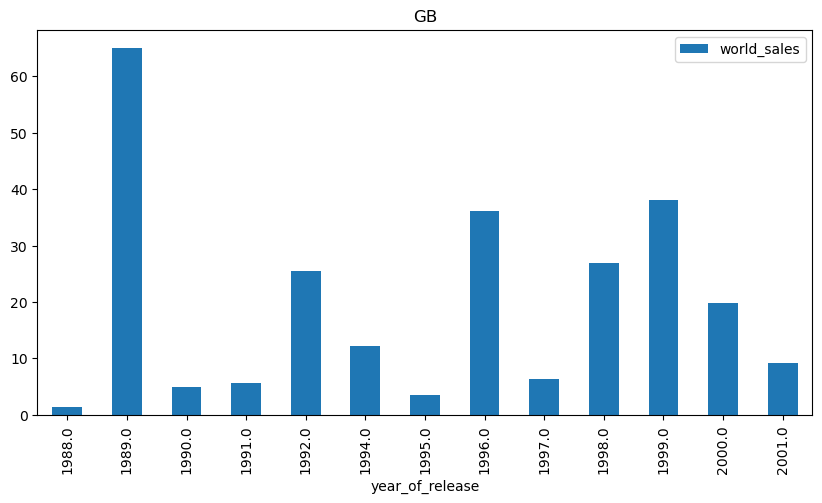

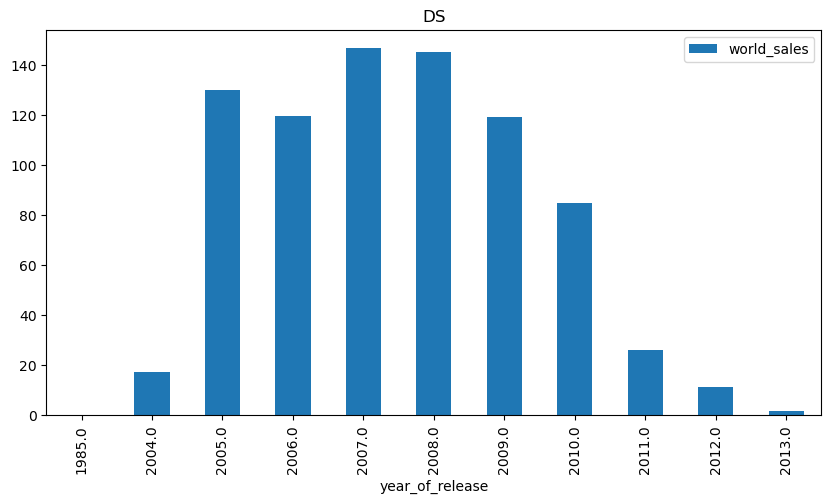

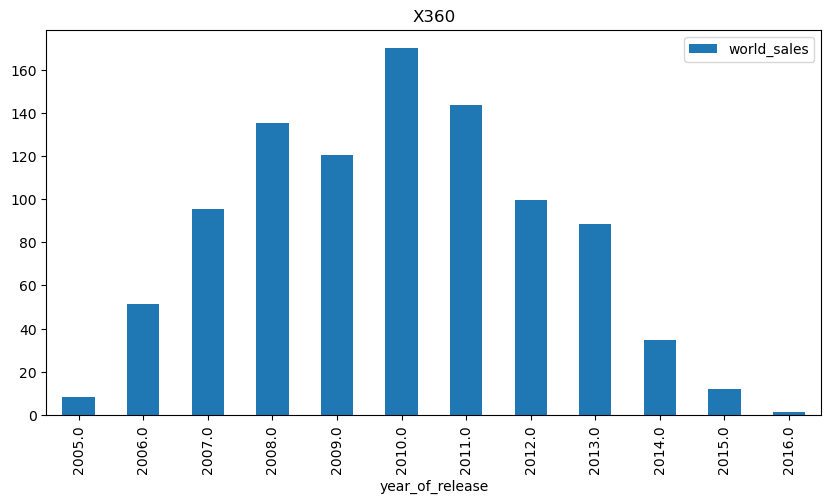

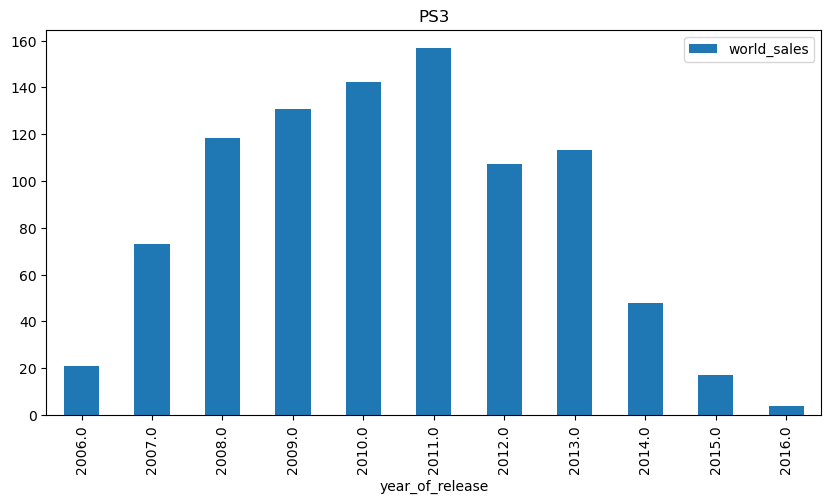

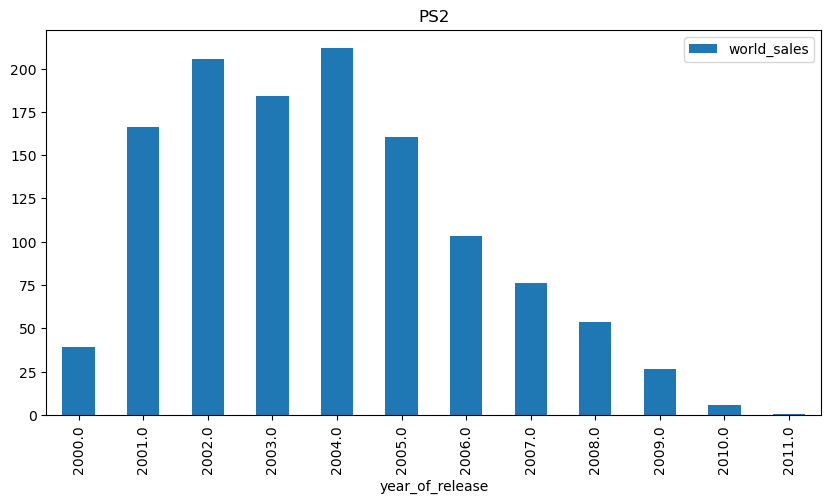

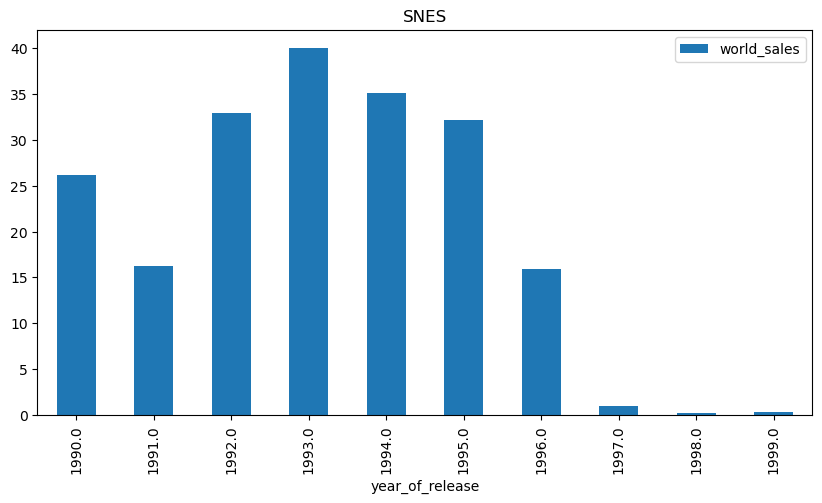

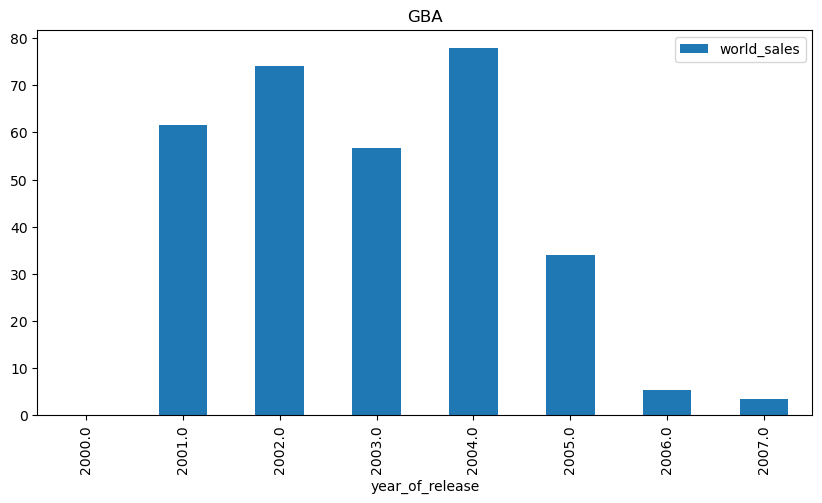

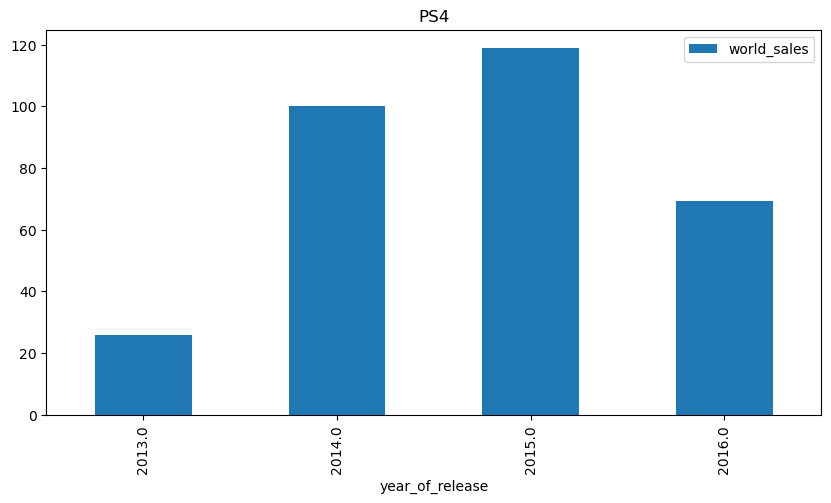

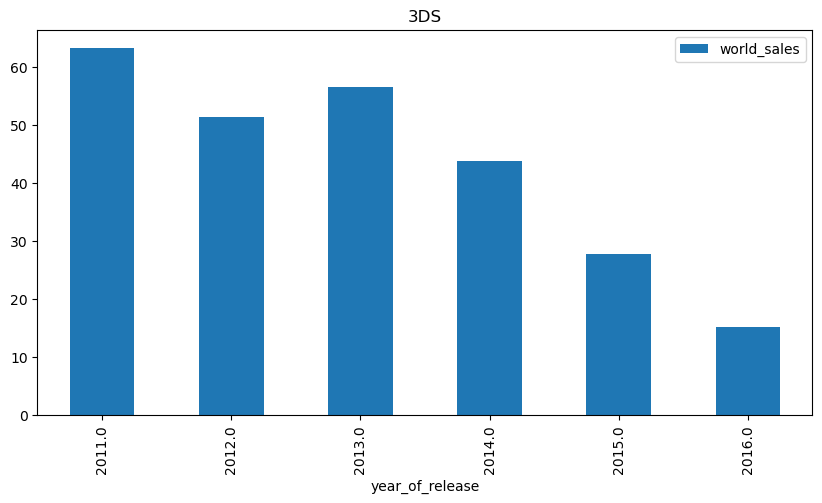

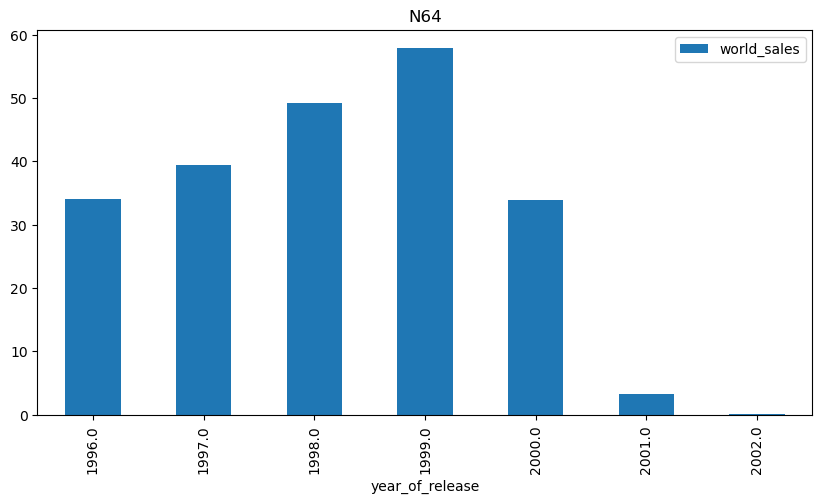

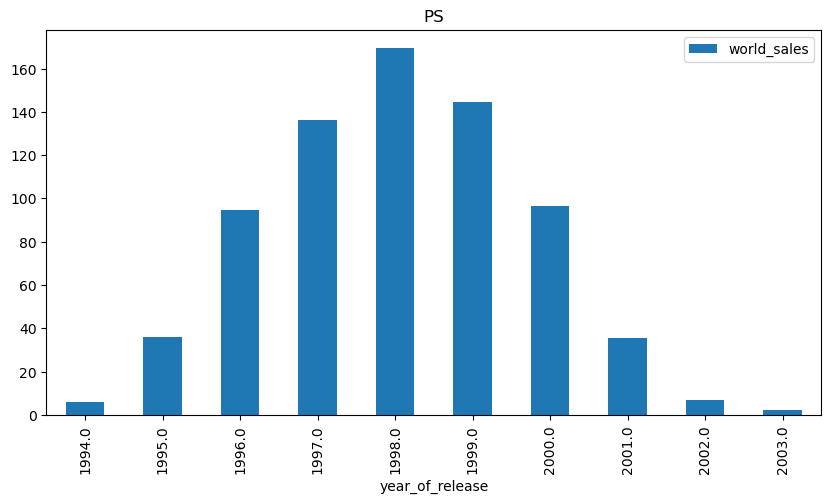

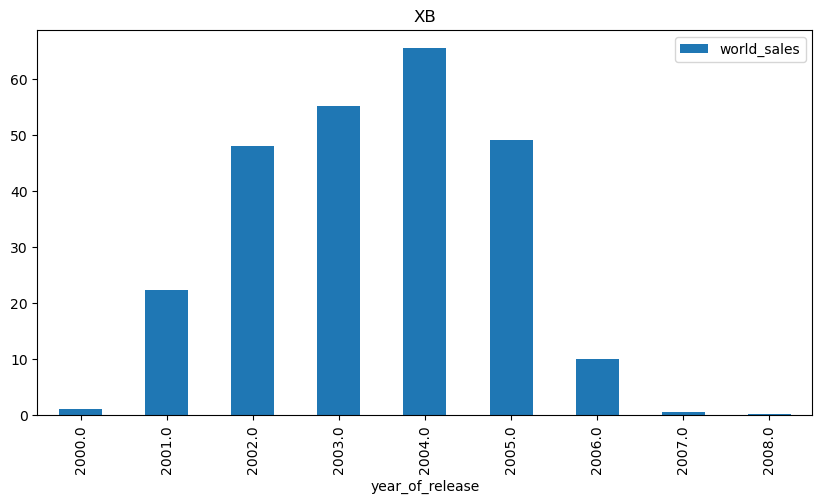

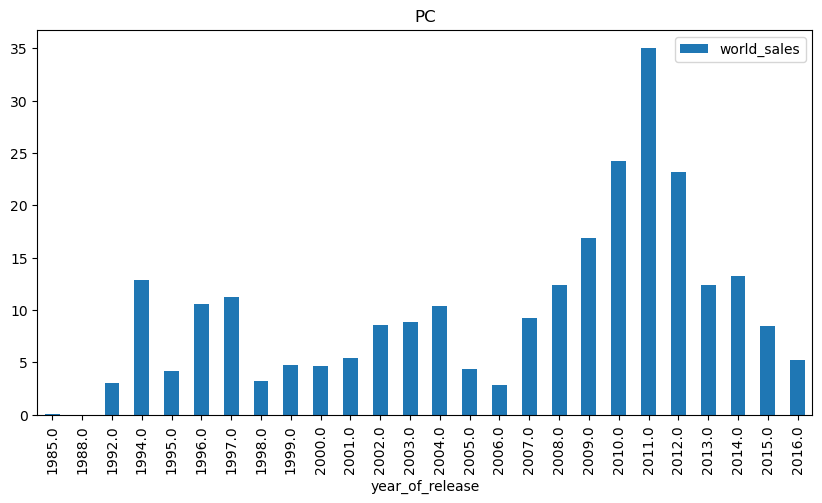

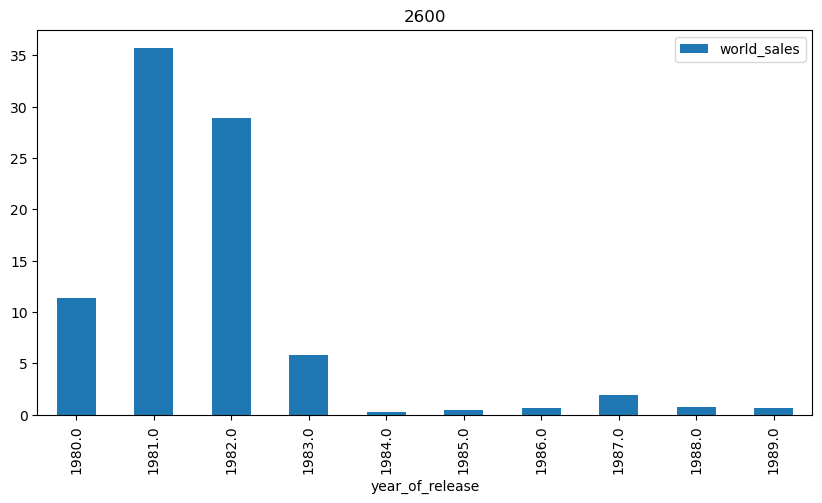

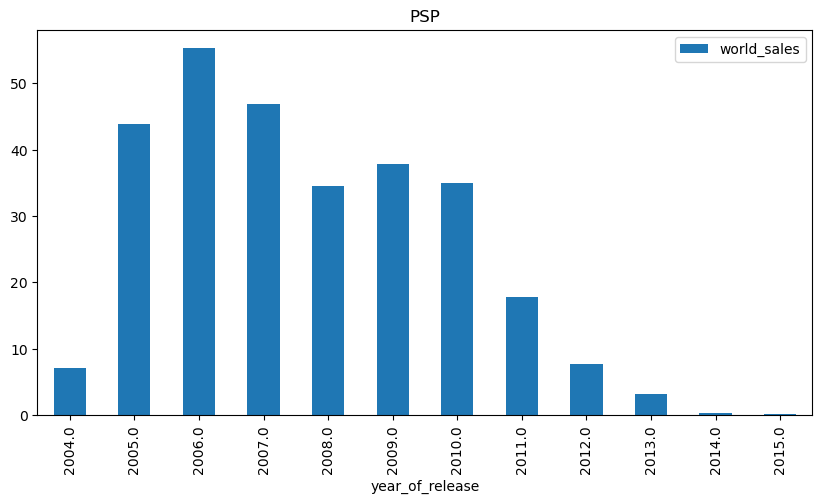

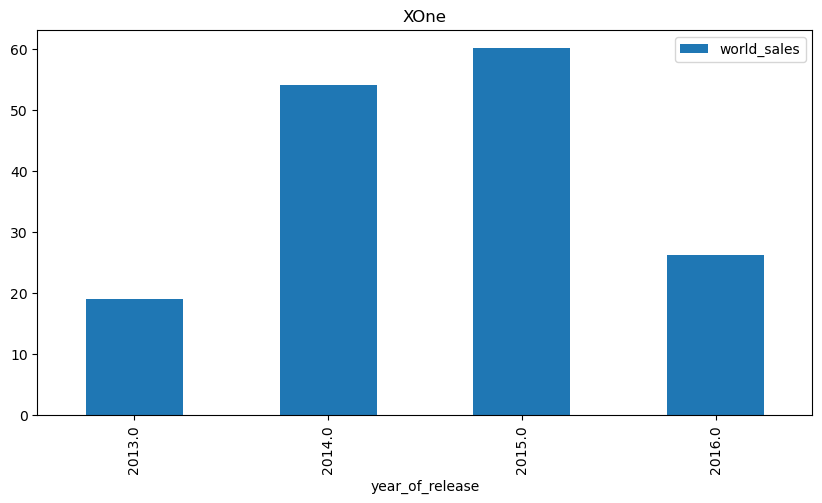

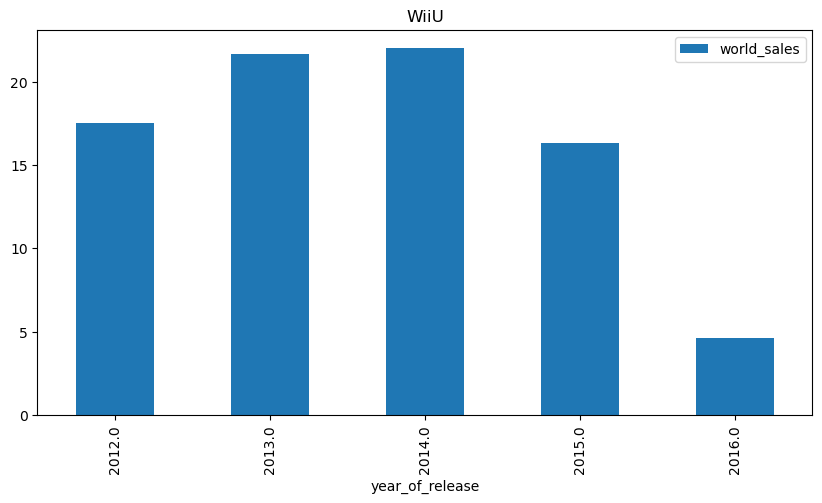

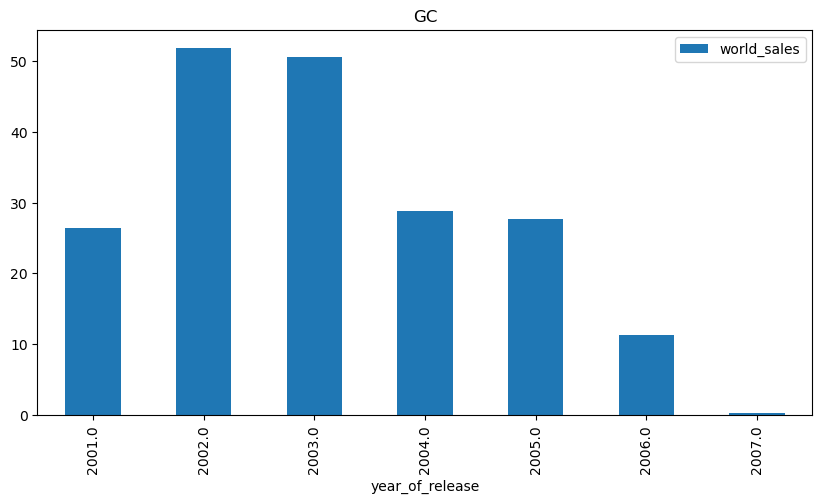

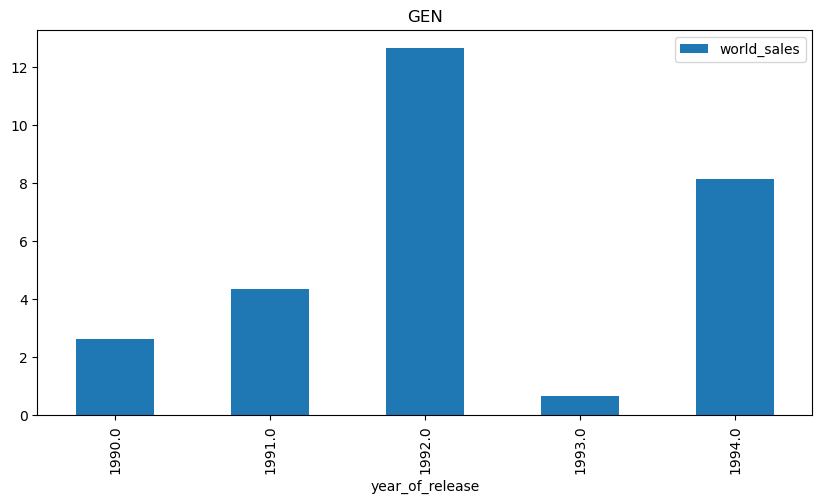

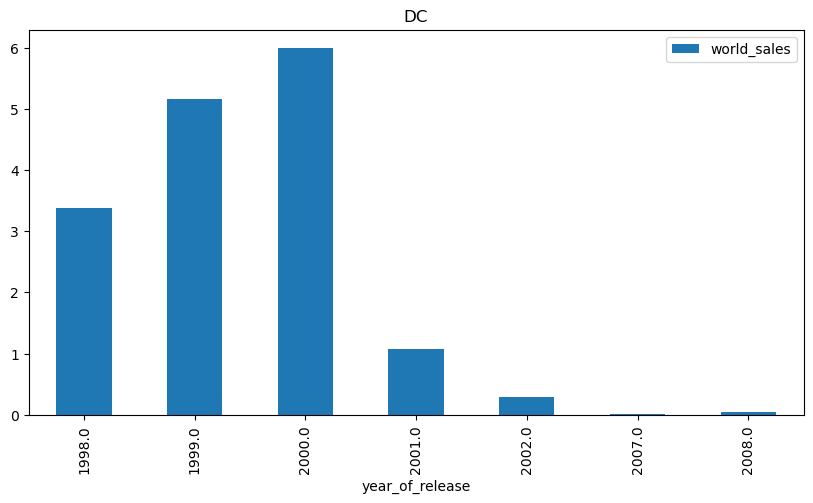

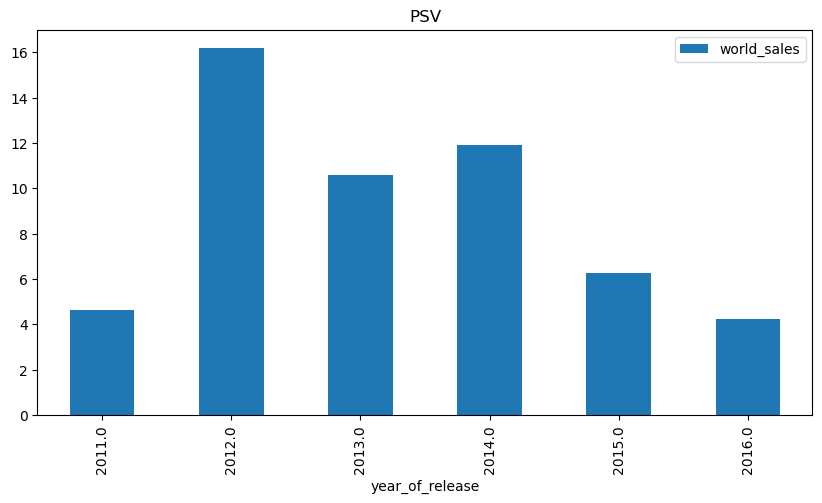

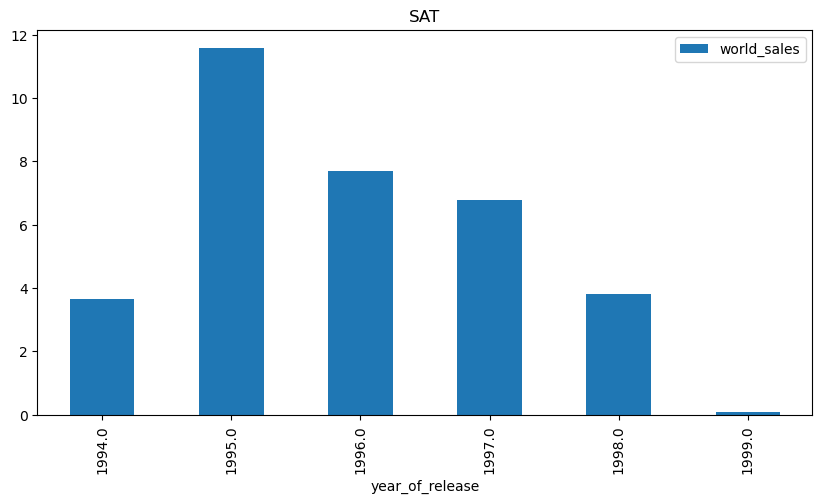

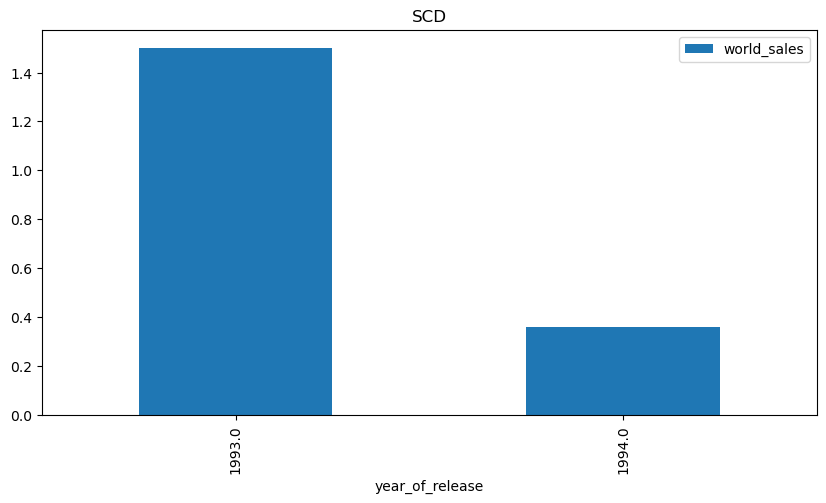

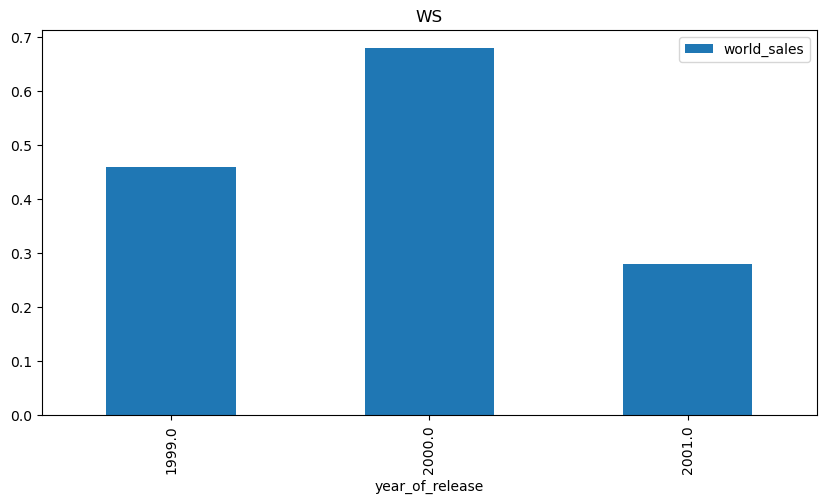

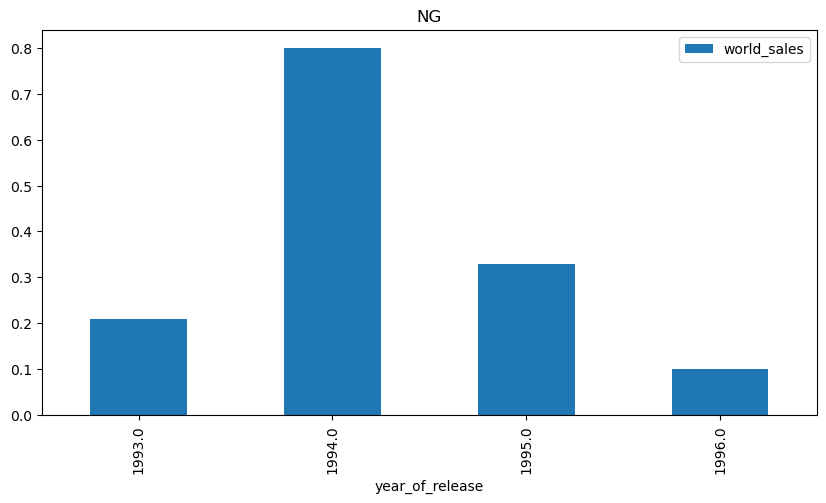

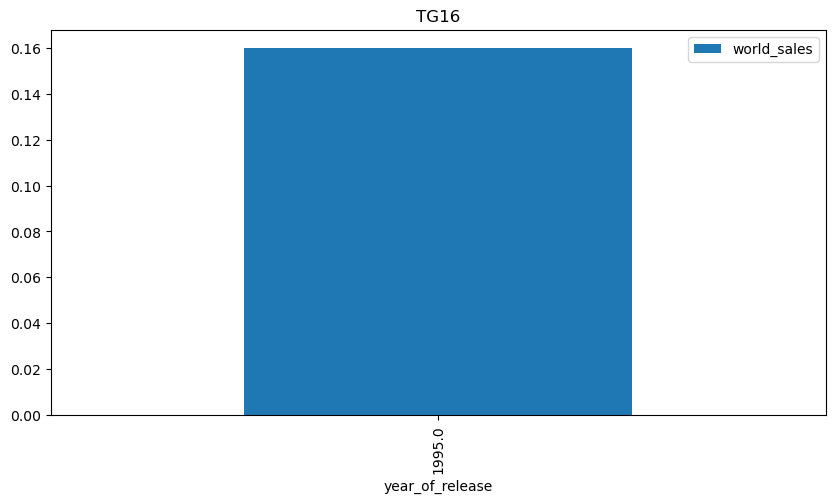

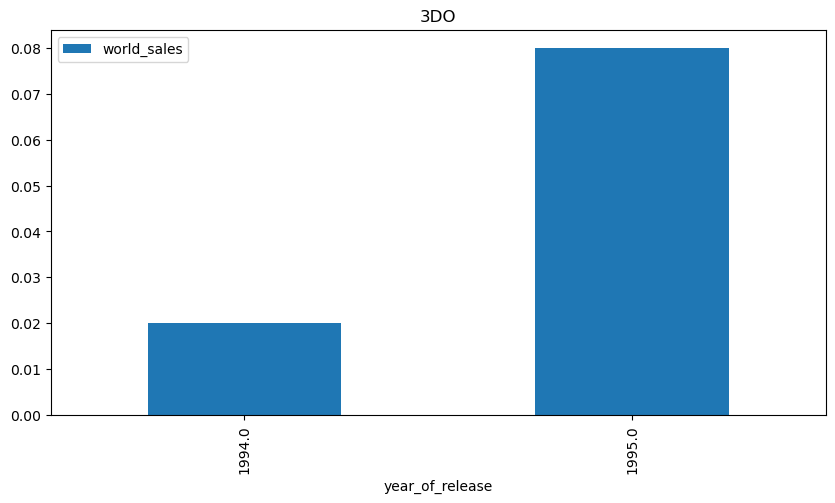

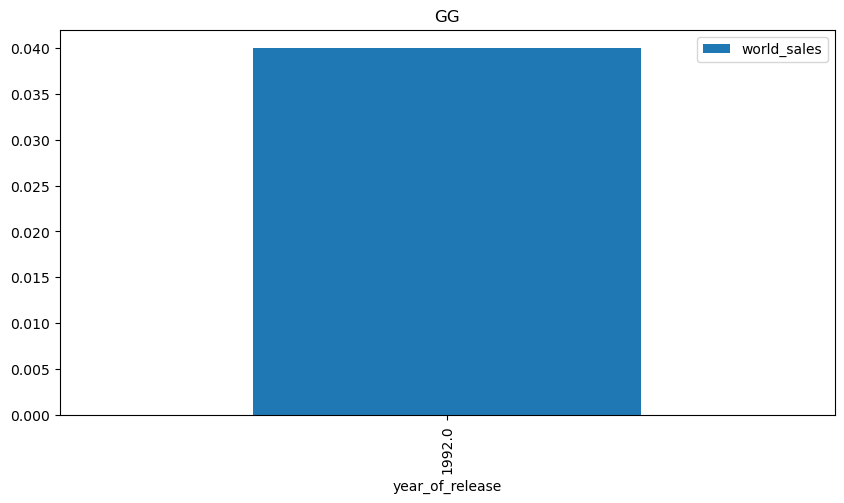

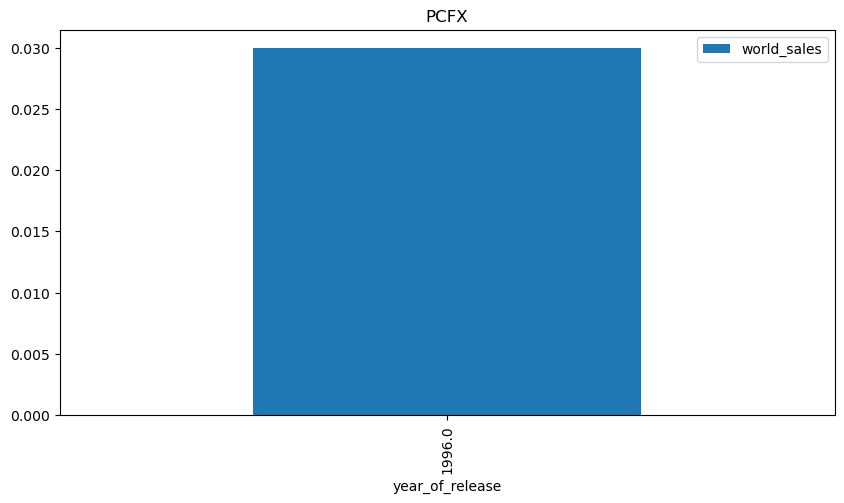

In [90]:
for platform in platform_data:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,5))
    plt.title(platform)
    plt.show()

In [91]:
top_5_platforms = df.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(
    by='world_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index()
top_5_platforms

,platform,world_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


 *Проанализировав диаграммы, мы можем сделать вывод период 'жизни' популярных платформ ~8 лет ( есть исключения которые сразу появились и пропали)\
Большая часть платформ уже имеет место быть только в музеях и коллекциях.  Из тех, кто еще имеет популярность в 2016 году, мы выделим: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PSV\
Но и они теряют свою популярность к 2016 году достаточно сильно*

### **Выберем актуальный период для анализа**

In [92]:
actual_period = df[df['year_of_release'] > 2011]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


*С одной стороны для анализа на следующий год мы должны взять 1-2 года до, но тогда мы теряем большое количество данных и не увидим все тенденции роста и падения\
Поэтому актуальным период был выбран с 2012 года, можем отметить и динамику и не попасть в совсем старые тренды*

### **Проанализируем суммарные продажи платформ за актуальный период**

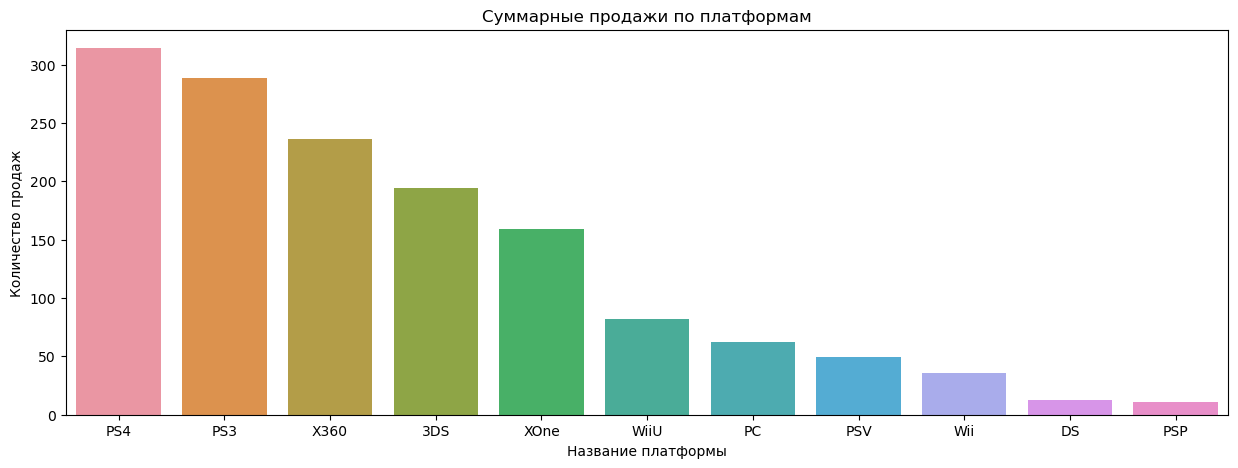

In [93]:
sales_by_platform_actual = actual_period.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(by = 'world_sales', ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = sales_by_platform_actual.index, y = sales_by_platform_actual['world_sales'])
plt.title('Суммарные продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()

In [94]:
sales_by_platform_actual.head(5)

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


In [95]:
top_5_platforms = actual_period[actual_period['platform'].isin(['PS4','XOne','3DS','WiiU','PS3'])]
top_5_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


*Пятерка лидеров по продажам : PS3, X360, PS4, 3DS, Wii\
Проанализируем тенденцию изменения продаж по годам*

### **Анализ продаж топ-платформ по годам**

In [96]:
new_actual_pivot = (top_5_platforms
    .pivot_table(index='platform', columns= 'year_of_release', values='world_sales', aggfunc='sum')
    .reset_index(drop= False)
    .fillna(0)            )
new_actual_pivot.columns = ['platform', '2012', '2013', '2014', '2015', '2016']
new_actual_pivot[[ '2012', '2013', '2014', '2015', '2016']] = new_actual_pivot[['2012', '2013', '2014', '2015', '2016']].astype('int')


(new_actual_pivot
    .sort_values(by='2016', ascending=False)
    .reset_index(drop=True)
    .style
    .background_gradient(axis=1, cmap='YlGn')
)

,platform,2012,2013,2014,2015,2016
0,PS4,0,25,100,118,69
1,XOne,0,18,54,60,26
2,3DS,51,56,43,27,15
3,WiiU,17,21,22,16,4
4,PS3,107,113,47,16,3


*PS4 появляется в 2013 году и имеет пик в 2014 - 2015 годах про продажам по предоставленным данным \
Xone значительно отстает от PS4 но тоже имеет пик в 2014 -2015 годах ( проигрывает сильно прямому конкуренту) по предоставленным данным\
Но так как по условию данные за 2016 год неполные, можем предположить, что такие новинки как Xbox One и PlayStation4 будут иметь пик продажа и в 2016 году, к примеру PlayStation 3 имела пик продаж с 2011 по 2013, а ее обновленная модель, пользующаяся успехом должна продержаться на пике как минимум столько же\
PS3, соответсвенно имеет пик продаж в 2010-2011, и с выходом новой версии теряет свою популярность\
Продукция Nintendo(3DS и WiiU) имела свой нишевый рынок соответственно в 2011-2012 и 2013-2014 годах, но была серьезно задавлена конкурентами PS и Xone*

### **Диаграмма размаха продаж по всем платформам**

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS3,493.0,0.585781,1.462855,0.01,0.05,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


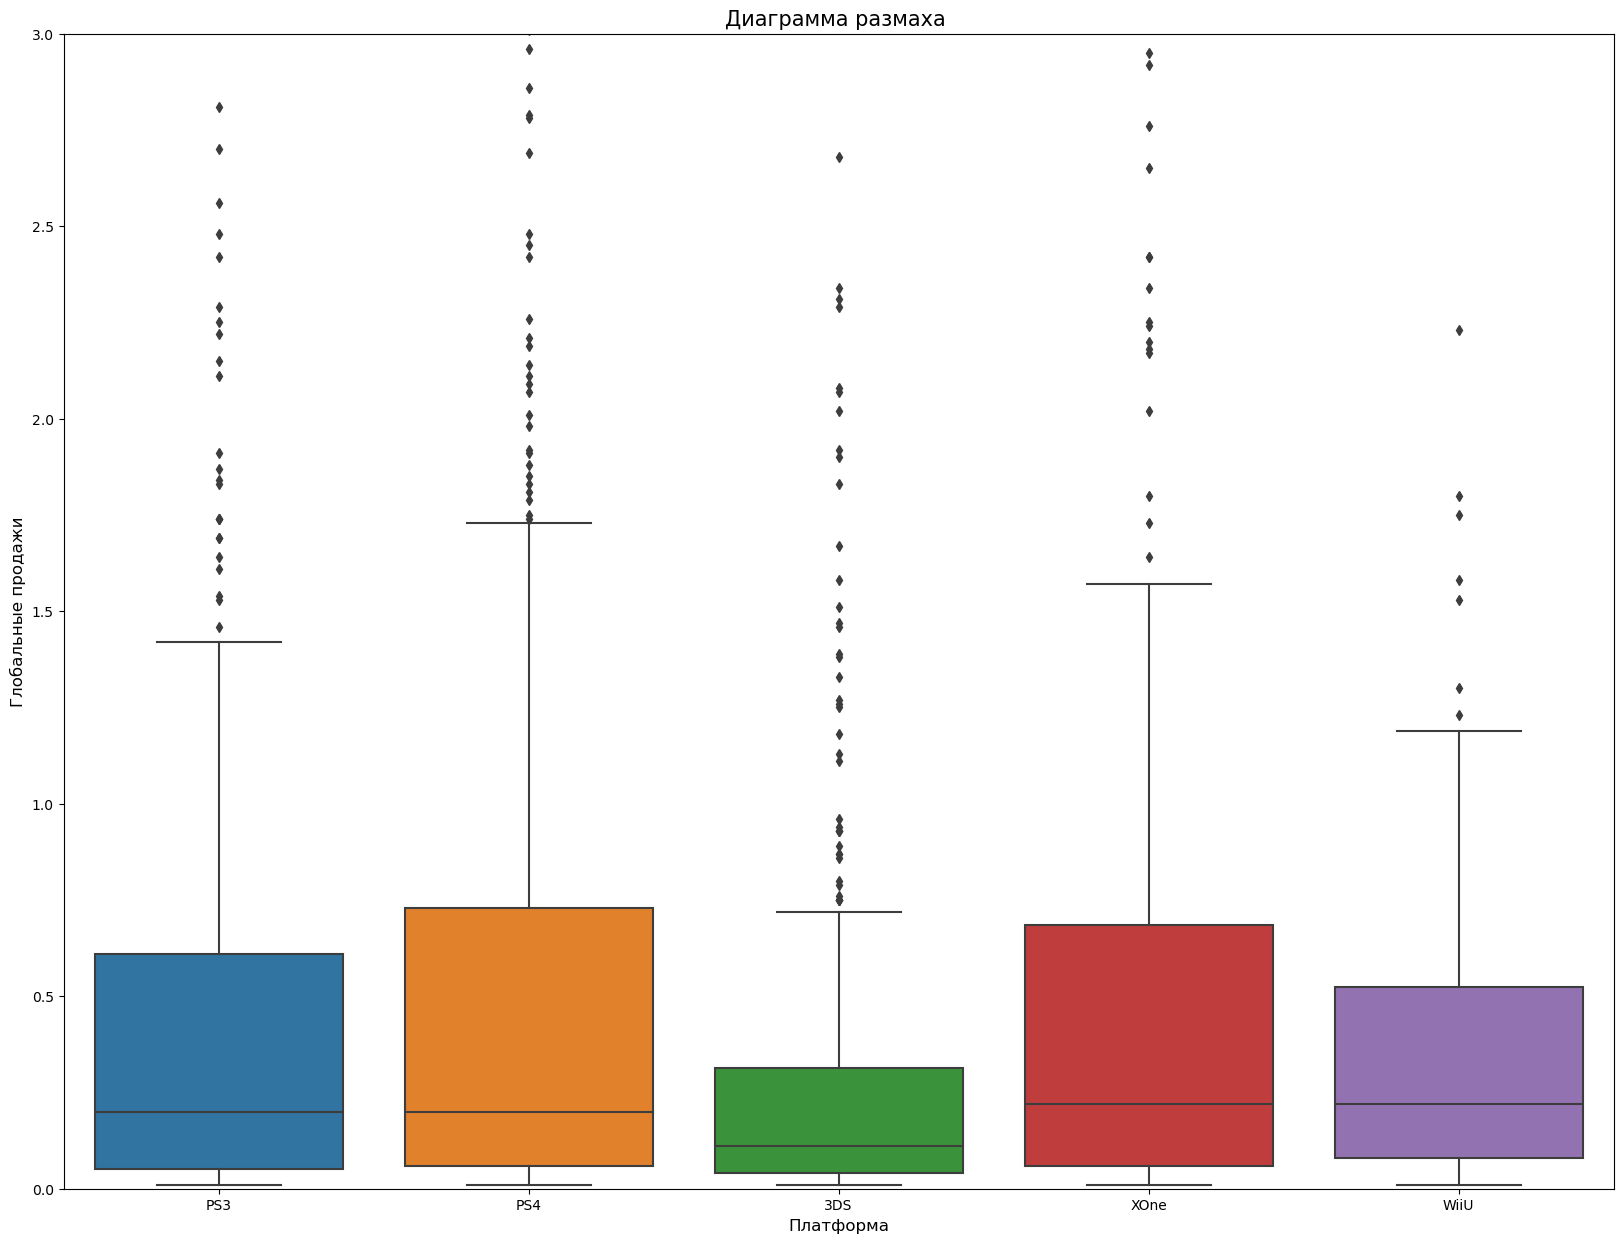

In [97]:
display(top_5_platforms.groupby('platform')['world_sales'].describe())
plt.figure(figsize=(20,15))
sns.boxplot(data=top_5_platforms, x='platform', y='world_sales')
plt.title('Диаграмма размаха ', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim([0,3])
plt.show()

*PS3, PS4, XOne имеют схожие характеристики, и условно одинаковые медианы(условно)\
3DS самые малые продажи, но это и старейшая платформа из представленных, достаточно допотопная\
WiiU более совреманная модель имеет и более лучшие продажи, но все равно по верхнему квартилю не дотягивает до тройки лидеров\
Можно предположить, что во времена более старых платформ сам рынок игр был намного менее развитым\
Можем отметить достаточное количество выбросов, за исключением WiiU*

**Анализ влияния рейтингов на продажи**

**PlayStation 4**

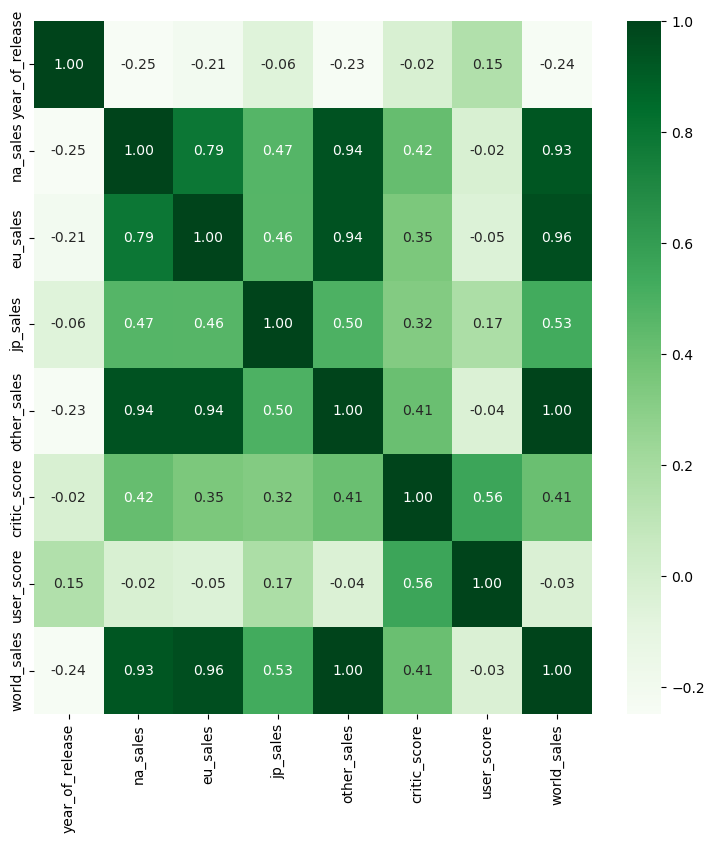

In [98]:
playstation_4 = actual_period[actual_period['platform'] == 'PS4']
plt.figure(figsize=(9,9))
sns.heatmap(playstation_4.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':10})
plt.show()

-0.03195711020455644

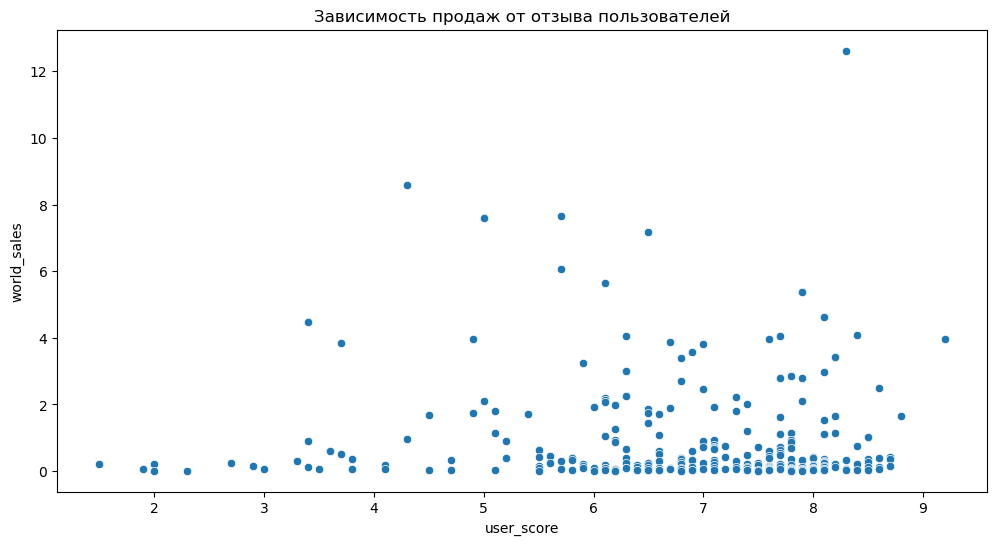

In [99]:
display(playstation_4['user_score'].corr(playstation_4['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=playstation_4)
plt.title('Зависимость продаж от отзыва пользователей')
plt.show()

0.40656790206178123

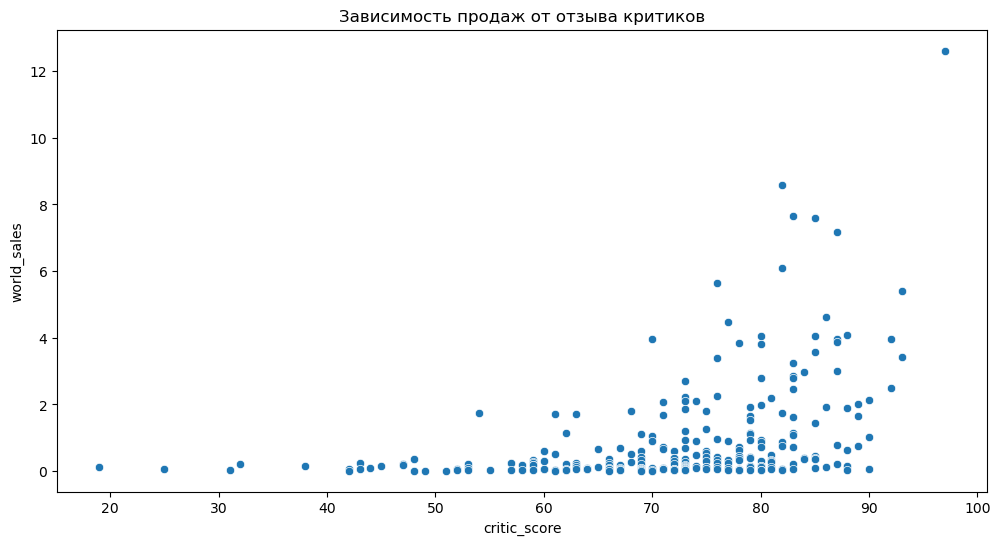

In [100]:
display(playstation_4['critic_score'].corr(playstation_4['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=playstation_4)
plt.title('Зависимость продаж от отзыва критиков')
plt.show()

*У PS4 нет никакой зависимости продаж от оценки пользователей, зависимость от оценки критиков незначительна*

**Xbox One**

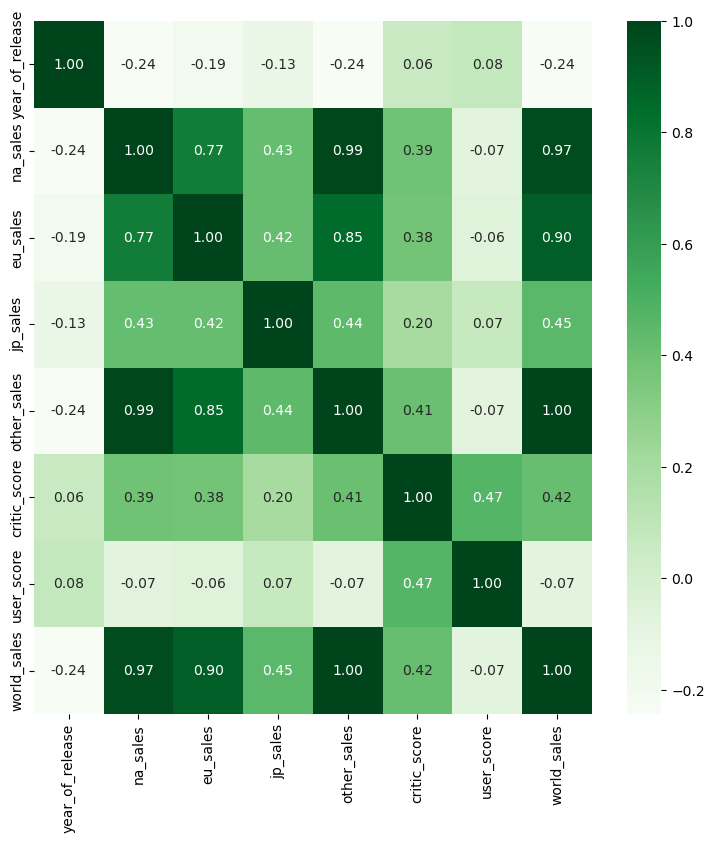

In [101]:
xbox_one = actual_period[actual_period['platform'] == 'XOne']
plt.figure(figsize=(9,9))
sns.heatmap(xbox_one.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':10})
plt.show()

-0.06892505328279418

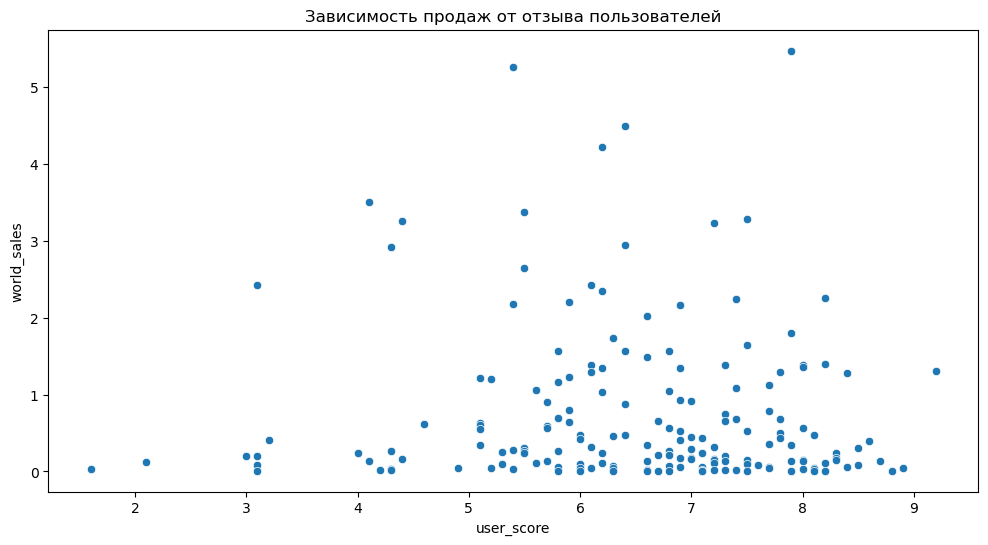

In [102]:
xbox_one = actual_period[actual_period['platform'] == 'XOne']
display(xbox_one['user_score'].corr(xbox_one['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=xbox_one)
plt.title('Зависимость продаж от отзыва пользователей')
plt.show()

0.41699832800840153

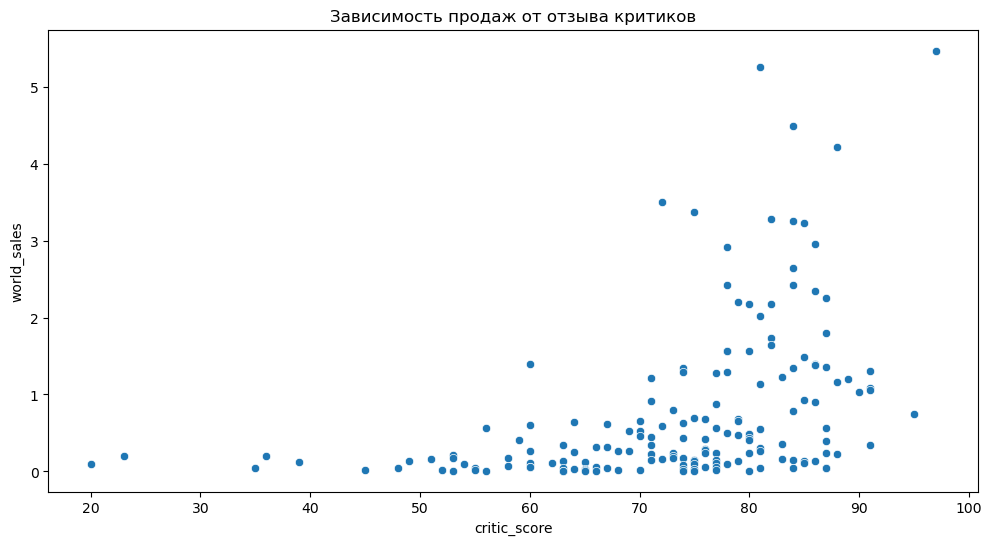

In [103]:
display(xbox_one['critic_score'].corr(xbox_one['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=xbox_one)
plt.title('Зависимость продаж от отзыва критиков')
plt.show()

*У XboxOne нет зависимости продаж от оценки пользователей, от оценки критиков зависимость низкая*

**Nintendo 3DS**

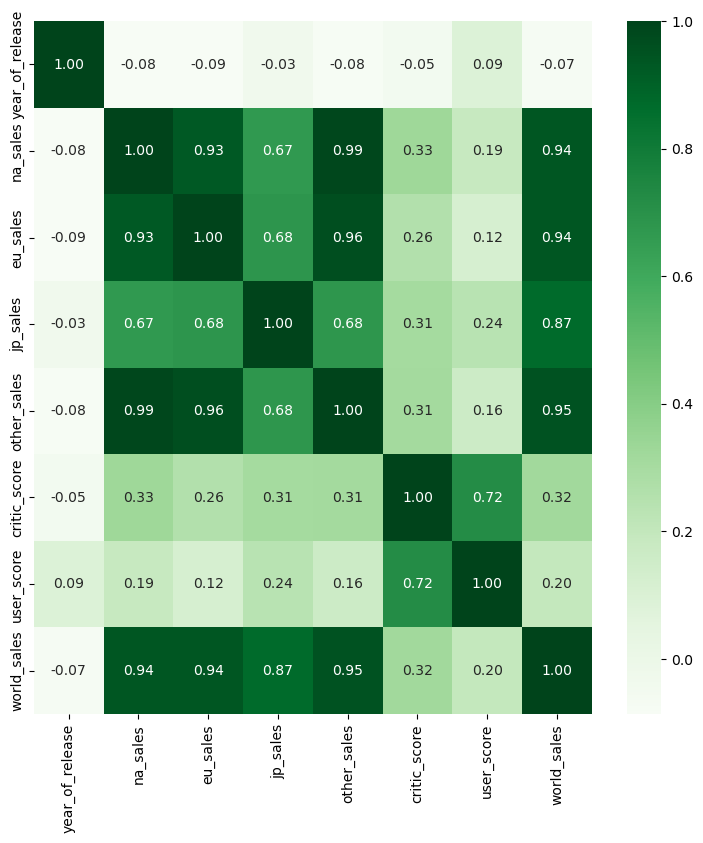

In [104]:
nintendo = actual_period[actual_period['platform'] == '3DS']
plt.figure(figsize=(9,9))
sns.heatmap(nintendo.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':10})
plt.show()

0.19758263411038593

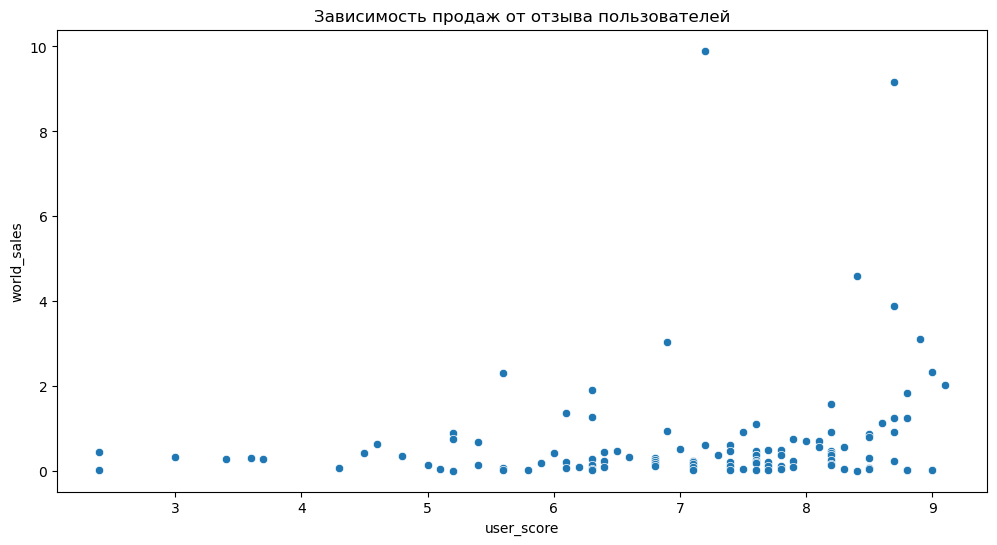

In [105]:
display(nintendo['user_score'].corr(nintendo['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=nintendo)
plt.title('Зависимость продаж от отзыва пользователей')
plt.show()

0.3208028695360785

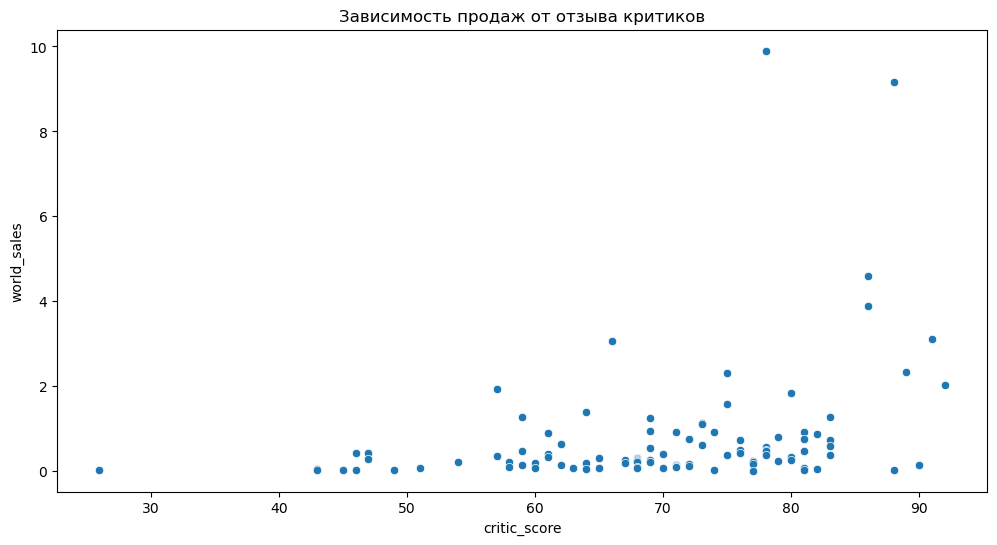

In [106]:
display(nintendo['critic_score'].corr(nintendo['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=nintendo)
plt.title('Зависимость продаж от отзыва критиков')
plt.show()

*У Nintendo 3DS зависимость продаж от оценки критиков и пользователей незначительна*

**Nintendo WiiU**

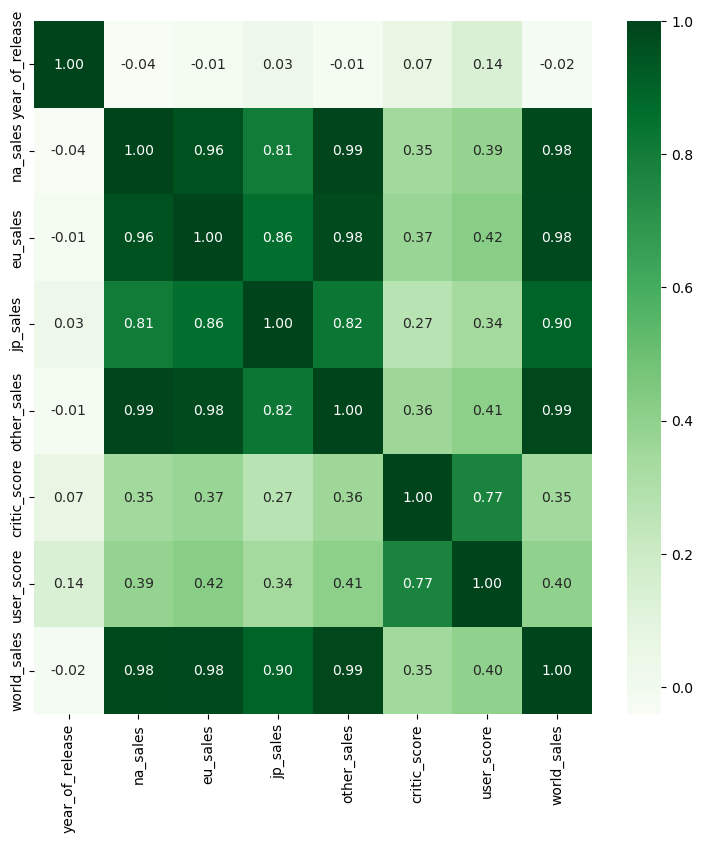

In [107]:
project_cafe = actual_period[actual_period['platform'] == 'WiiU']
plt.figure(figsize=(9,9))
sns.heatmap(project_cafe.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':10})
plt.show()

0.40021902021486194

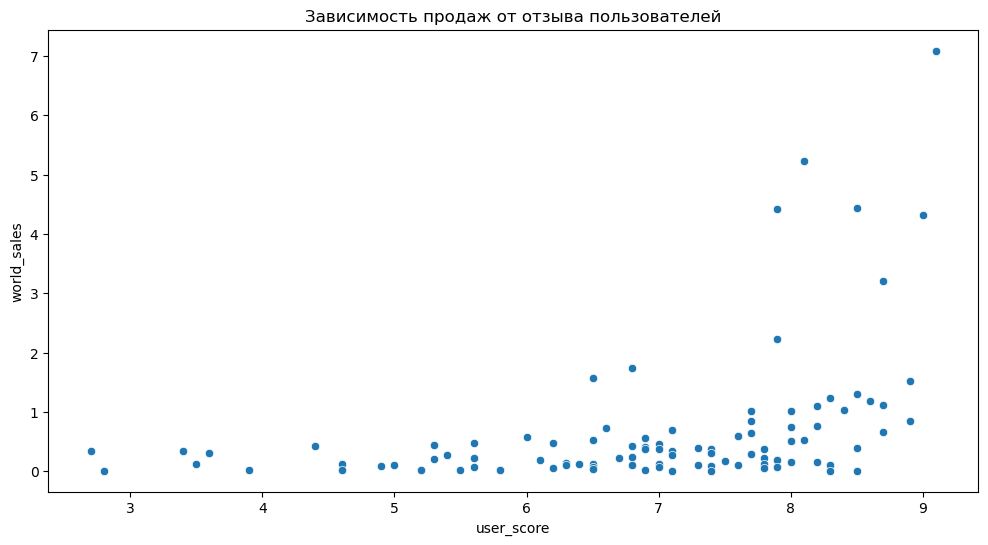

In [108]:
display(project_cafe['user_score'].corr(project_cafe['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=project_cafe)
plt.title('Зависимость продаж от отзыва пользователей')
plt.show()

0.34837976012017496

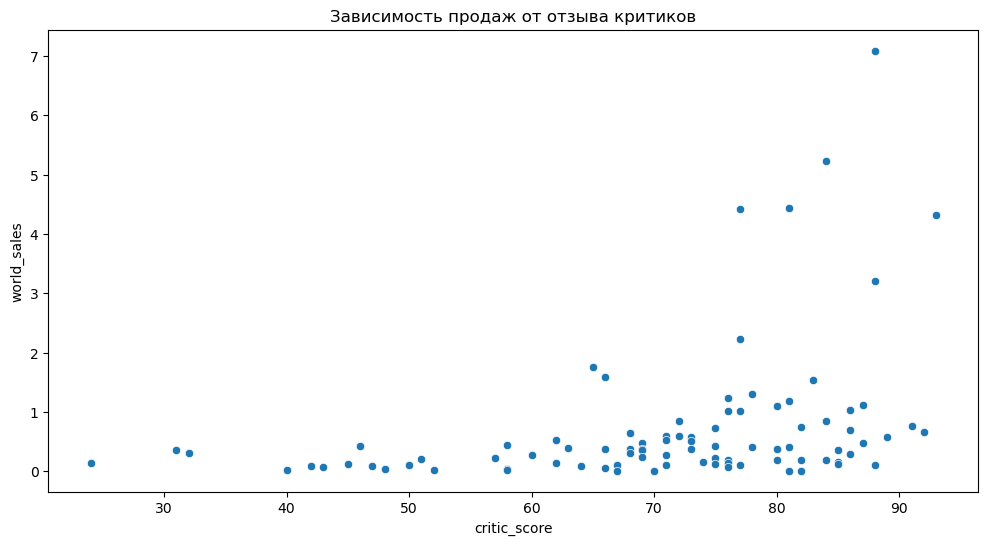

In [109]:
display(project_cafe['critic_score'].corr(project_cafe['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=project_cafe)
plt.title('Зависимость продаж от отзыва критиков')
plt.show()

*Зависимость продаж от оценки критиков и пользователей у Nintendo WiiU низкая*

**PlayStation 3**

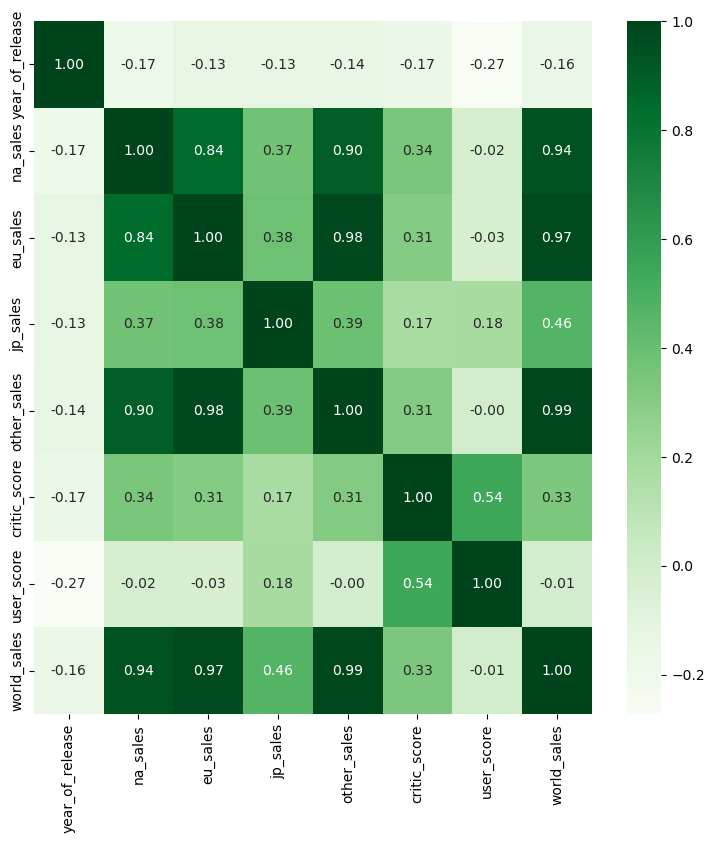

In [110]:
playstation_3 = actual_period[actual_period['platform'] == 'PS3']
plt.figure(figsize=(9,9))
sns.heatmap(playstation_3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':10})
plt.show()

-0.005143522887113829

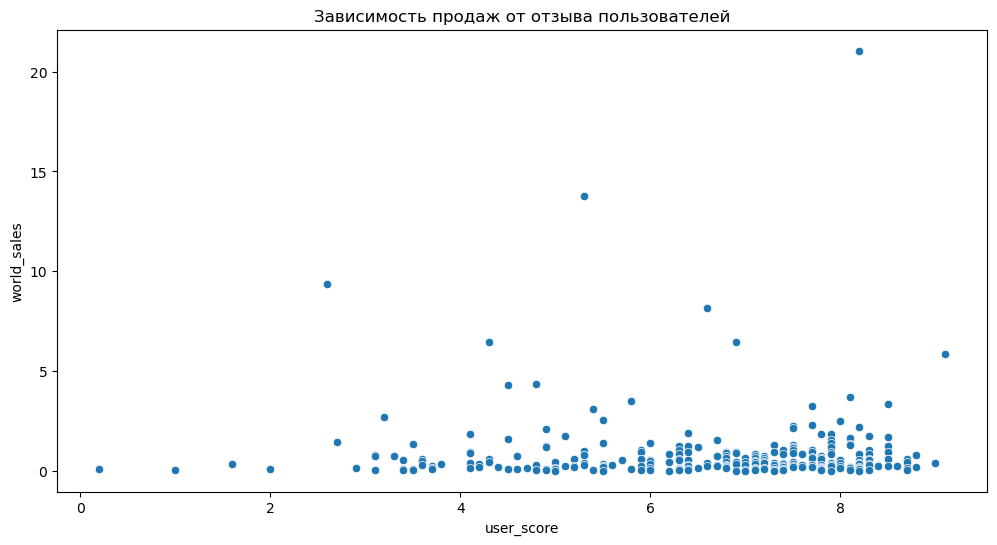

In [111]:
display(playstation_3['user_score'].corr(playstation_3['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=playstation_3)
plt.title('Зависимость продаж от отзыва пользователей')
plt.show()

0.33149725926295903

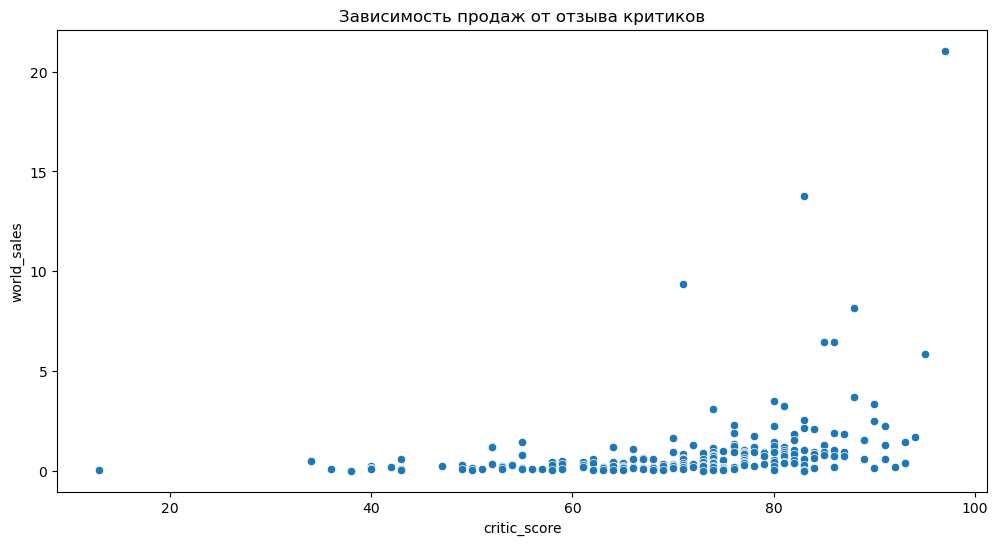

In [112]:
display(playstation_3['critic_score'].corr(playstation_3['world_sales']))
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=playstation_3)
plt.title('Зависимость продаж от отзыва критиков')
plt.show()

*Зависимость продаж от оценки критиков у PlayStation 3 низкая\
Зависимость продаж от оценки пользователей отсутствует*

**Распределение продаж игр по жанрам**

,genre,world_sales
0,Action,313.72
1,Shooter,215.42
2,Role-Playing,144.35
3,Sports,134.58
4,Platform,53.52
5,Misc,46.41
6,Racing,41.64
7,Fighting,36.83
8,Simulation,23.83
9,Adventure,19.58


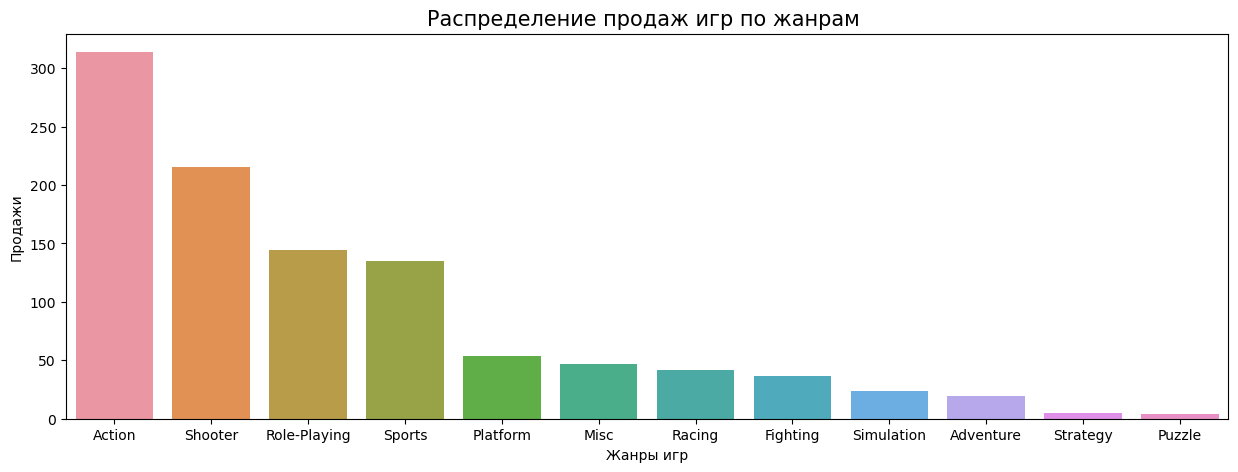

In [113]:
top_genre = top_5_platforms.pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).reset_index()
display(top_genre)
plt.figure(figsize=(15,5))
plt.title('Распределение продаж игр по жанрам ',fontsize=15)
sns.barplot(x='genre', y='world_sales', data=top_genre)
plt.xlabel('Жанры игр',fontsize=10)
plt.ylabel('Продажи',fontsize=10)
plt.show()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63


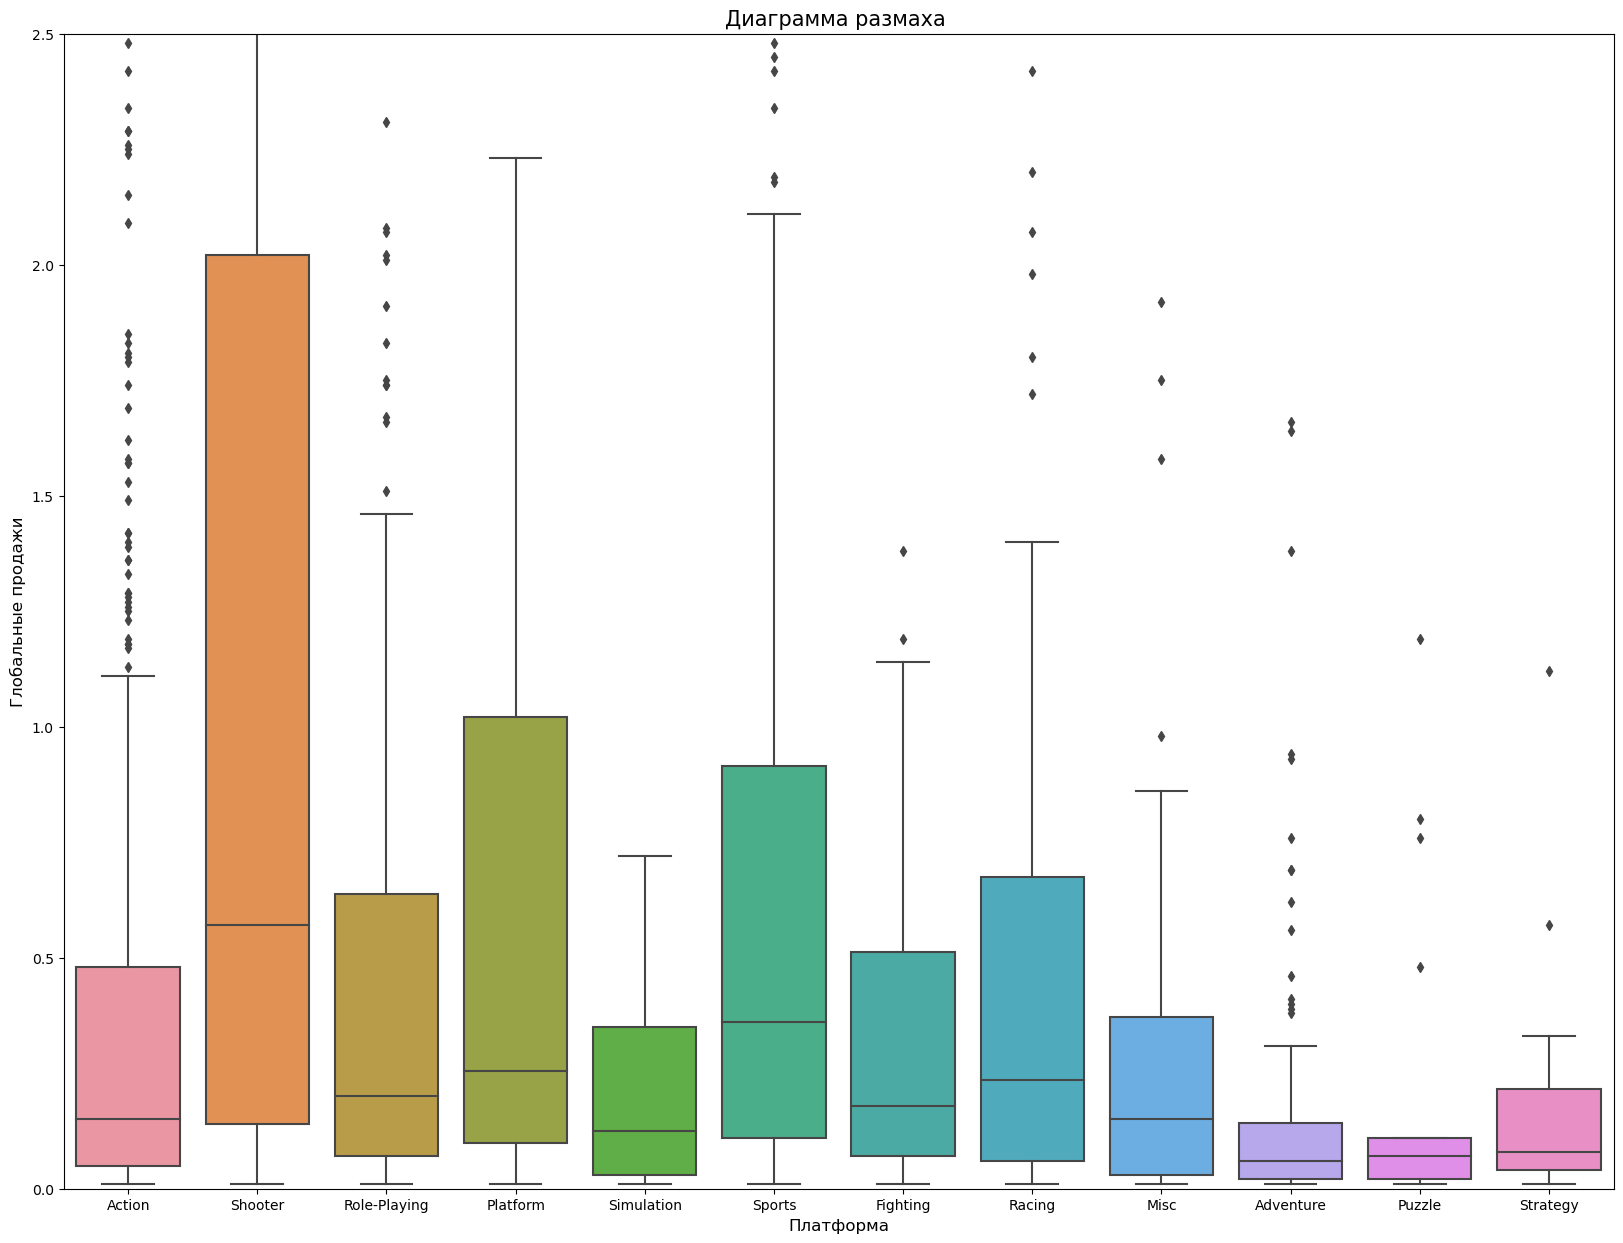

In [114]:
display(actual_period.groupby('genre')['world_sales'].describe())
plt.figure(figsize=(20,15))
sns.boxplot(data=top_5_platforms, x='genre', y='world_sales')
plt.title('Диаграмма размаха ', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim([0,2.5])
plt.show()

*Распределение по суммарным продажам и медианным разительно отличаются\
Тот же жанр Экшн к примеру\
По итогу мы имеем у жанров Shooter, Platform, Sports игры в среднем лучше продаются\
У жанров Puzzle, Strategy, Adventure в среднем продажи намного ниже\


**Портрет пользователя каждого региона**

In [115]:
def rating_by_regions(groupby, region_sales, ax):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North American Sales', 'eu_sales': 'European Sales', 'jp_sales': 'Japanese Sales'}
    color_dict = {'na_sales': 'brown', 'eu_sales': 'gray', 'jp_sales': 'orange'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=16, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':15})
    plot.set_xlabel('')
    plot.title.set_size(19)

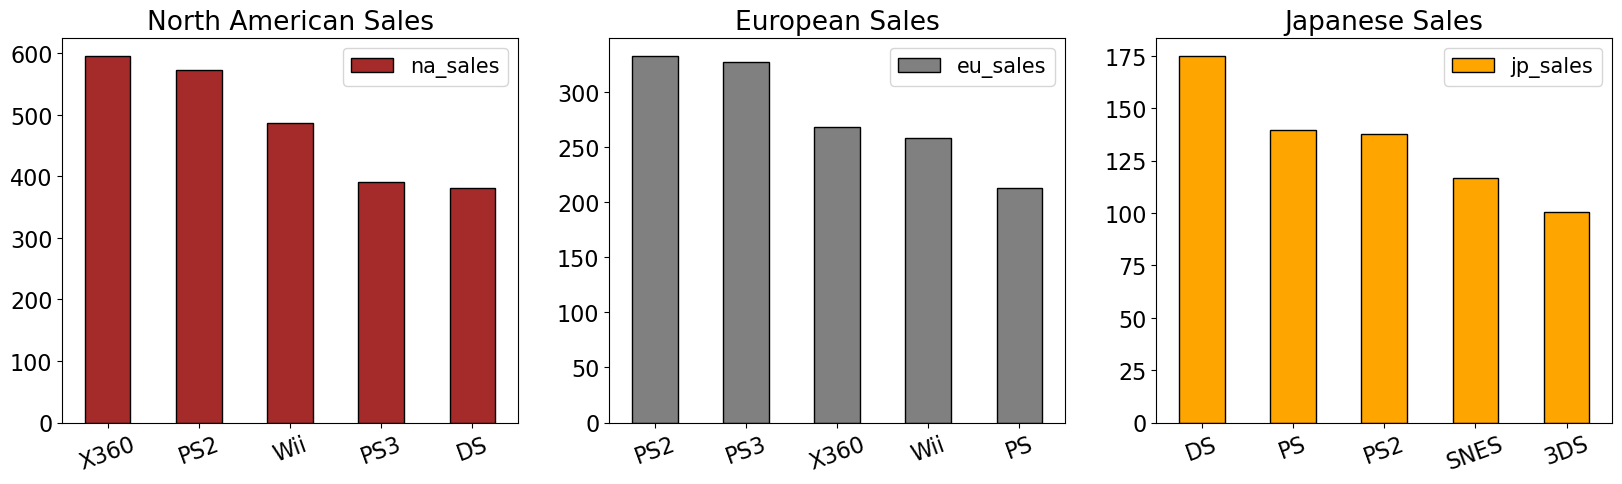

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

rating_by_regions('platform', 'na_sales', 0)
rating_by_regions('platform', 'eu_sales', 1)
rating_by_regions('platform', 'jp_sales', 2)

*Лидеры в каждом регионе по продажам разные\
В США это Xbox, PlayStation 2 и Nintendo Wii\
В Европе это PlayStation2, Playstation 3, Xbox\
В Японии это Nintendo DS, PlayStation, PlayStation2\
Вероятно в Японию новинки приходят с опозданием*

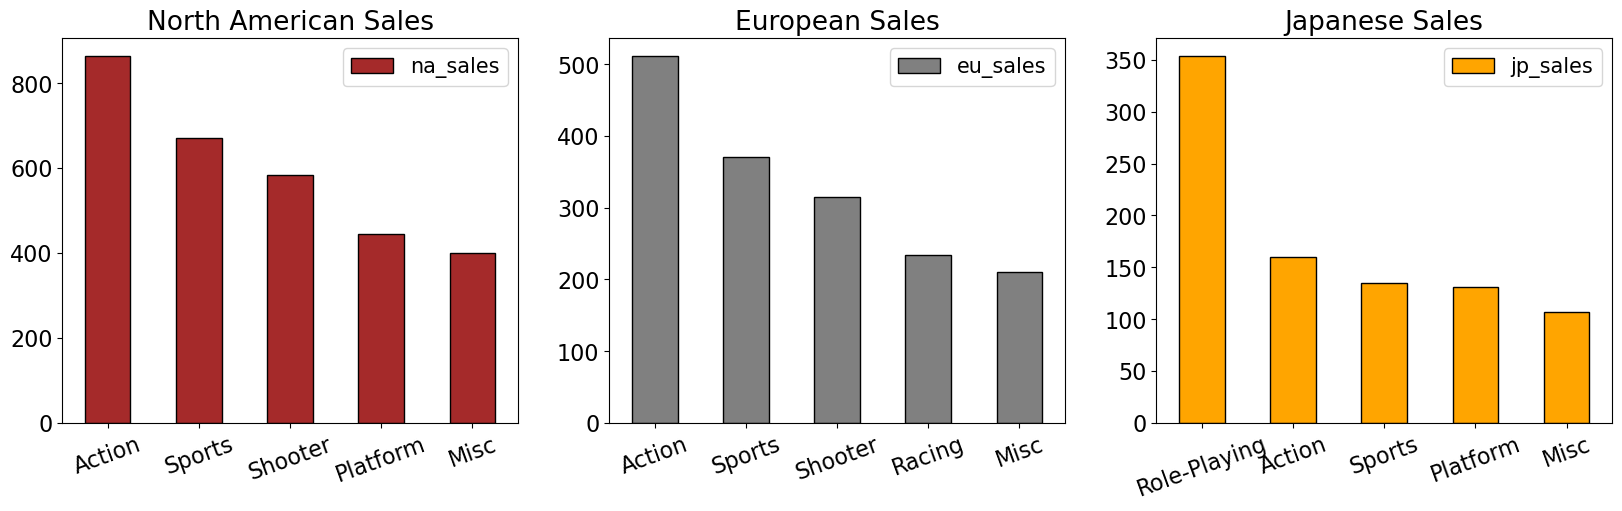

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

rating_by_regions('genre', 'na_sales', 0)
rating_by_regions('genre', 'eu_sales', 1)
rating_by_regions('genre', 'jp_sales', 2)

*В Европе и Америке предпочитают одинаковые жанры игр - Экшн, Спортивные игры, Шутеры\
В Японии это естественно Ролевые игры, Экшн и Спортивные игры\
Японский регион известен своим увлечением ролевок, а шутеры в регионе имеют строгий ценз и возрастные запреты*

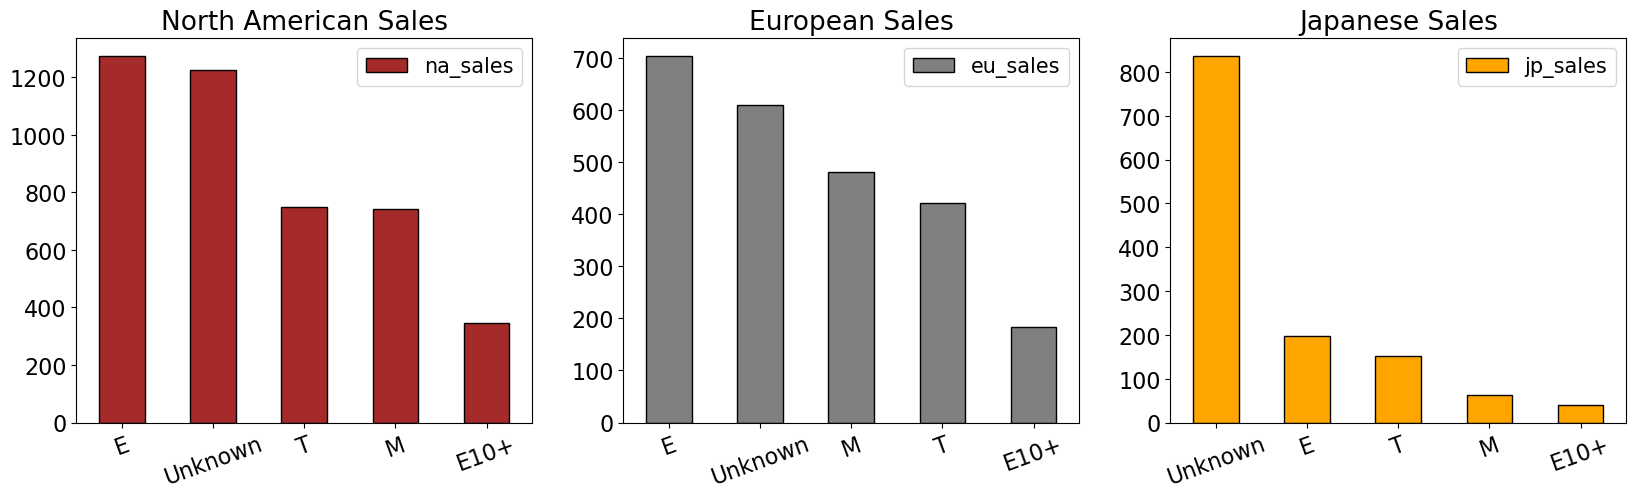

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

rating_by_regions('rating', 'na_sales', 0)
rating_by_regions('rating', 'eu_sales', 1)
rating_by_regions('rating', 'jp_sales', 2)

*EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.\
E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.\
E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.\
T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.\
M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.\
AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.\
Unknown - игры без рейтинга
Во всех странах очень продаваемы игры без рейтинга, предполагаю, это для избежания возрастного ценза, в особенности в Японском регионе, где за этим строго следят и подвергают сильным ограничениям. В США и Европе наиболее продаваемы игры для всех возрастов.

**Проверка гипотез**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

*Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

In [119]:
data_platform_1 = actual_period[actual_period['platform']=="XOne"]['user_score'].dropna()
data_platform_2 = actual_period[actual_period['platform']=="PC"]['user_score'].dropna()



In [120]:
alpha = .05

results = st.ttest_ind(data_platform_1, data_platform_2)
   

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


*Мы можем утверждать, что пользовательский рейтинги этих платформ за актуальный период одинаковые*

**Средние пользовательские рейтинги жанров Action и Sports  разные**

*Ho - средние оценки пользователей жанров Action и Sports одинаковые.\
H1 - средние оценки отличаются.*

In [121]:
data_genre_1 = actual_period[actual_period['genre']=="Action"]['user_score'].dropna()
data_genre_2= actual_period[actual_period['genre']=="Sports"]['user_score'].dropna()

In [122]:
alpha = .05 

results = st.ttest_ind(
    data_genre_1, 
    data_genre_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


*Мы не можем утверждать, что средние оценки пользователей этих жанров одинаковые => они разные*

**Общий вывод**

1)Была произведена предобработка данных:
Удалены пропуски;\
Преобразованы типы данных;\
Обьяснили значения tbd в столбце гоценка пользователей и заменена на nan\
2)Добавили в датафрейм столбец с суммарными продажами игр по миру\
3)Провели исследовательский анализ:\
3.1)Анализ продаж игр по годам:\
увидели рост продаж после 95 года и падение продаж после 2008-2009 годов\
Пояснение:\
Начало развития мира компьютерных игр, игр на приставки - появление CD- носителей, появление новых операционок, появление и немалая популярность приставок : SEGA, PS, XBOX, PSP ( в дальнейшем)\
Развитие интернета - реклама, платформы для продажи игр\
Спад после 2008-2009 года - развитие мобильных игр, развитие мобильных операционок, спад интереса в приставках - уклон в мобильные и компьютерные игры в своей массе\
3.2)Анализ продаж игр по платформам:\
Явная пятерка лидеров: PS2, X360, PS3, Wii, DS, PS - основоположники и 'легенды" приставок\
Временной период "жизни' популярных платформ - 8-10 лет\
3.3)Выбрали актуальный период для дальнейшего анализа - данные с 2012 года по 2016\
Пояснение:\
Выбрали максимально возможный период - 5 лет, чтобы и заметить динамику по платформам, но и не сильно зацепить старые тренды
3.4) Анализ продаж по топ платформам за актуальный период:\
PlayStation3, Xbox One, Nintendo 3DS, Nintendo WiiU, PlayStation 4\
PS4 появляется в 2013 году и имеет пик в 2014 - 2015 годах про продажам\
Xone значительно отстает от PS4 но тоже имеет пик в 2014 -2015 годах ( проигрывает сильно прямому конкуренту)\
PS3, соответсвенно имеет пик продаж в 2010-2011, и с выходом новой версии теряет свою популярность\
Продукция Nintendo(3DS и WiiU) имела свой нишевый рынок соответственно в 2011-2012 и 2013-2014 годах, но была серьезно задавлена конкурентами PS и Xone\
3.5)Диаграмма размаха продаж по всем платформам:\
PS3, PS4, XOne имеют схожие характеристики, и условно одинаковые медианы(условно)\
3DS самые малые продажи, но это и старейшая платформа из представленных, достаточно допотопная\
WiiU более совреманная модель имеет и более лучшие продажи, но все равно по верхнему квартилю не дотягивает до тройки лидеров\
Можно предположить, что во времена более старых платформ сам рынок игр был намного менее развитым\
Можем отметить достаточное количество выбросов, за исключением WiiU\
3.6)Анализ влияния оценки критиков и пользователей на продажи игр на топ платформы за актуальный период:\
Не влияют на продажи игр ни на одну платформу\
3.7)Распределение продаж игр по жанрам:\
Неоспоримые лидеры это шутеры, спортивные игры и платформки , явные аутсайдеры - паззлы и стратегии\
Но нельзя не забывать про факт дешевизны таких игр как пазлы, аркады(Misc), платформенные\
Впринципе все 6 жанров с конца достаточно дешевые в производстве и нишевые продукты и по соотносимости затраты на производство/прибыль в процентном соотношение могут даже выигрывать у лидеров\
4)Портерт пользователй:\
4.1)Лидеры в каждом регионе по продажам разные\
В США это Xbox, PlayStation 2 и Nintendo Wii\
В Европе это PlayStation2, Playstation 3, Xbox\
В Японии это Nintendo DS, PlayStation, PlayStation2\
Вероятно в Японию новинки приходят с опозданием\
4.2)В Европе и Америке предпочитают одинаковые жанры игр - Экшн, Спортивные игры, Шутеры\
В Японии это естественно Ролевые игры, Экшн и Спортивные игры\
Японский регион известен своим увлечением ролевок, а шутеры в регионе имеют строгий ценз и возрастные запреты\
4.3)Можно сказать, что во всех регионах одинаковый рейтинг в топе продаж - для всех возрастов , за исключением Японии - там самый продаваемые игры без возрастного рейтинга, из за сильных ограничений и цензур, да и впринципе культуры того региона
В США и Европе тоже присутствует цензура и ограничения, поэтому там тоже очень продаваемы игры без возрастного рейтинга
5)Проверка гипотез:\
5.1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
Мы можем утверждать, что пользовательский рейтинги этих платформ за актуальный период одинаковые\
5.2)Средние пользовательские рейтинги жанров Action и Sports  разные\
Мы не можем утверждать, что средние оценки пользователей этих жанров одинаковые, соответственно они разные\

Для 2017 года мы можем предположить, что самые востребованные игры - это шутеры на PS4 и в частности XboxOne, в первую очередь следует сфокусироваться на них, далее это спортивные игры и платформенные\
По регионам нужно сделать фокус на США и Европу, Японский регион лучше не трогать, из за жестких ограничений по цензуре и цензу, сложно продать игры, да и жанры там востребованы совсем другие\
В Японию можно попробовать  продавать Role-playing игры, они имеют бешенную популярность в регионе 